---
format: html
# echo: False
warning: False

title: "A Comprehensive Exploration of Chronic Absenteeism Data Across Seven Schools"
author: "Lan Dinh"
image: "chronic-absenteeism.jpg"
categories:
    - data analysis
    - machine learning
---

## Introduction

Chronic absenteeism—defined here as missing more than 10% of enrolled days—can have a profound impact on a student’s academic performance and future prospects. Frequent absences correlate with lower grades, increased dropout rates, and diminished long-term outcomes. By understanding which factors drive absenteeism, educators and policymakers can design more targeted interventions.

In this notebook, I analyze records from seven schools over seven academic years. My overarching goal is to identify patterns and predictors of chronic absenteeism, with the ultimate aim of guiding effective attendance-improvement strategies. 

---

## Motivation

Student attendance is more than just a line item in school administrative data. It’s linked to:

- **Academic Achievement:** Students who attend school regularly often see better test scores and improved GPAs.  
- **Equity Considerations:** Certain demographic groups (e.g., English Learners, low-income students) might face unique challenges that affect attendance.  
- **Resource Allocation:** Understanding absenteeism helps schools allocate counselors, attendance monitors, and program funding more effectively.  
- **Long-Term Impact:** Chronic absenteeism in earlier grades can ripple through a student’s educational trajectory, potentially influencing high school completion and college readiness.

By examining variables such as attendance rates, days enrolled, demographic details, and special program status, I seek to paint a clearer picture of how these features interrelate and what they reveal about absenteeism trends.

---

## Dataset Description

The dataset in this study is collected from seven schools in the Oakland Unified School District over seven years, from 2012 to 2024. The seven schools are:

- **Castlemont**  
- **East Oakland PRIDE**  
- **Elmhurst United**  
- **MLK**  
- **McClymonds**  
- **Prescott**  
- **WOMS**

Each file spans multiple academic years, resulting in a total of over 20,000 student-year observations. The key columns include:

- **ANON_ID:** A unique, anonymized student identifier.  
- **Birthdate:** Date of birth, from which I derived each student’s approximate age.  
- **Gen:** Student’s gender.  
- **Eth:** Ethnicity (e.g., Latino, African American, White, etc.).  
- **Fluency:** English proficiency classification (e.g., EO, EL, RFEP, IFEP).  
- **SpEd:** Special Education status (e.g., “Special Ed” or “Not Special Ed”).  
- **Grade:** Student’s grade for that academic year (-1 through 12 in this dataset).  
- **AttRate:** Attendance rate (1 – [Days Absent / Days Enrolled]).  
- **DaysEnr:** Number of days enrolled in that school year.  
- **DaysAbs:** Number of days absent in that school year.  
- **Susp:** Number of suspensions.  
- **CurrWeightedTotGPA:** Weighted GPA, if applicable.  
- **SED:** Socio-economically Disadvantaged status.  
- **School:** Name of the school.  
- **Year:** Academic year label (e.g., "17-18", "18-19").  
- **Age:** Computed from birth year and the school year.  
- **ChroAbs:** Binary variable (1 if absent more than 10% of enrolled days, 0 otherwise).

---

## 1. Dataset Overview

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display

In [ ]:
# Load 7 schools dataset
castlemont = pd.read_csv('data/Castlemont.csv')
eof = pd.read_csv('data/East Oakland PRIDE.csv')
elmhurst_united = pd.read_csv('data/Elmhurst United.csv')
mlk = pd.read_csv('data/MLK.csv')
mcClymonds = pd.read_csv('data/McClymonds.csv')
prescott = pd.read_csv('data/Prescott.csv')
woms = pd.read_csv('data/ONGB -Lan/WOMS.csv')
# castlemont.head()

In [ ]:
# Concatenate into one dataframe
schools = pd.concat([castlemont, eof, elmhurst_united, mlk, mcClymonds, prescott, woms]).reset_index(drop=True)
schools.head(5)

,ANON_ID,Birthdate,Gen,Eth,Fluency,SpEd,Grade,AttRate,DaysEnr,DaysAbs,Susp,CurrWeightedTotGPA,SED,School,Year
0,338,2003-07-21,F,Latino,RFEP,Not Special Ed,9,0.9889,180.0,2.0,NaN,3.65,Unknown,Castlemont,17-18
1,340,2003-03-31,M,Latino,EL,Not Special Ed,9,0.8389,180.0,29.0,2.0,0.06,Unknown,Castlemont,17-18
2,478,2003-09-06,F,Multiple Ethnicity,EO,Special Ed,9,0.7263,179.0,49.0,1.0,0.24,Unknown,Castlemont,17-18
3,686,2000-04-02,M,Latino,EL,Not Special Ed,12,0.9611,180.0,7.0,NaN,2.00,Unknown,Castlemont,17-18
4,693,2002-03-28,F,Latino,RFEP,Not Special Ed,10,0.9889,180.0,2.0,NaN,2.59,Unknown,Castlemont,17-18


In [ ]:
# Add age (school year - birthdate) column
def calculate_age(df):
  df['Birthdate'] = pd.to_datetime(df['Birthdate'])
  end_year = df['Year'].str.split('-').str[0].astype(int)
  year = end_year.apply(lambda x: 2000 + x)
  df['Age'] = year - df['Birthdate'].dt.year
  return df

schools = calculate_age(schools)
schools.head(5)

,ANON_ID,Birthdate,Gen,Eth,Fluency,SpEd,Grade,AttRate,DaysEnr,DaysAbs,Susp,CurrWeightedTotGPA,SED,School,Year,Age
0,338,2003-07-21,F,Latino,RFEP,Not Special Ed,9,0.9889,180.0,2.0,NaN,3.65,Unknown,Castlemont,17-18,14
1,340,2003-03-31,M,Latino,EL,Not Special Ed,9,0.8389,180.0,29.0,2.0,0.06,Unknown,Castlemont,17-18,14
2,478,2003-09-06,F,Multiple Ethnicity,EO,Special Ed,9,0.7263,179.0,49.0,1.0,0.24,Unknown,Castlemont,17-18,14
3,686,2000-04-02,M,Latino,EL,Not Special Ed,12,0.9611,180.0,7.0,NaN,2.00,Unknown,Castlemont,17-18,17
4,693,2002-03-28,F,Latino,RFEP,Not Special Ed,10,0.9889,180.0,2.0,NaN,2.59,Unknown,Castlemont,17-18,15


In [ ]:
# Add ChroAbs column with 1 is student who absent for more than 10% of enrolled days
abs_per = schools['DaysAbs'] / schools['DaysEnr']
schools['ChroAbs'] = [1 if x > 0.1 else 0 for x in abs_per]
schools.tail(5)

,ANON_ID,Birthdate,Gen,Eth,Fluency,SpEd,Grade,AttRate,DaysEnr,DaysAbs,Susp,CurrWeightedTotGPA,SED,School,Year,Age,ChroAbs
21989,77312,2009-10-26,M,African American,EO,Not Special Ed,8,0.9611,180.0,7.0,NaN,2.39,SED,WOMS,23-24,14,0
21990,77803,2011-06-30,M,Latino,EO,Special Ed,7,0.6222,45.0,17.0,NaN,0.00,SED,WOMS,23-24,12,1
21991,78129,2011-10-09,F,Latino,RFEP,Not Special Ed,6,0.9441,179.0,10.0,NaN,3.38,Not SED,WOMS,23-24,12,0
21992,78498,2011-06-21,M,African American,EO,Not Special Ed,7,0.9333,180.0,12.0,NaN,3.66,SED,WOMS,23-24,12,0
21993,79427,2012-01-10,M,Latino,RFEP,Not Special Ed,6,0.7375,80.0,21.0,NaN,3.37,SED,WOMS,23-24,11,1


Initially, I observed that Attendance Rate and Days Absent are critical measures as they are directly linked to Chronic Absenteeism. GPA (CurrWeightedTotGPA) variable is important as I assume that lower academic performance is typically associated with higher absenteeism. Demographic factors such as Gender and Ethnicity provide context for understanding potential disparities in academic performance as well as absenteeism patterns. Fluency is another significant variable, as language barriers often correlate with performance challenges, especially for non-native speakers. The SpEd reports whether students have special educational needs, and SED indicates economic disadvantage, both of which can substantially impact educational engagement. Economic hardship, for example, has been linked to lower attendance rates and higher absenteeism.

Furthermore, the dataset have missing or inconsistent values that need to be addressed. DaysEnr variable has unusually low numbers, which could make absenteeism rates appear higher than they are. Susp has the highest number of missing values (20,556 records). There are 6,441 missing values in CurrWeightedTotGPA, accounting for a large portion of the dataset. Each of the AttRate, DaysEnr, and DaysAbs has 29 missing entries. In terms of inconsistent values, SED column has 6,317 entries labeled as Unknown. In the Fluency column, there are 100 entries marked as TBD and 6 as Unknown. These missing and inconsistent values will be addressed further

In [ ]:
from IPython.display import display, HTML
# Generate HTML for each column's value counts
html_output = "<div style='display: flex; flex-wrap: wrap;'>"

for col in cat_cols:
    # Get the value counts for the column
    counts = schools[col].value_counts()

    # Create an HTML table for the value counts of each column
    html_output += f"""
    <div style='margin-right: 20px; padding: 10px; border: 1px solid #ddd;'>
        <h4>{col}</h4>
        {counts.to_frame().to_html(header=False)}
    </div>
    """

html_output += "</div>"

# Display all counts side by side in HTML format
display(HTML(html_output))

Gen,
M,11857
F,10113
N,24
Eth,
Latino,10645
African American,8335
White,840
Asian,753
Not Reported,526
Multiple Ethnicity,424


In [ ]:
# Info for all schools over past 7 years
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21994 entries, 0 to 21993
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ANON_ID             21994 non-null  int64         
 1   Birthdate           21994 non-null  datetime64[ns]
 2   Gen                 21994 non-null  object        
 3   Eth                 21994 non-null  object        
 4   Fluency             21994 non-null  object        
 5   SpEd                21994 non-null  object        
 6   Grade               21994 non-null  int64         
 7   AttRate             21965 non-null  float64       
 8   DaysEnr             21965 non-null  float64       
 9   DaysAbs             21965 non-null  float64       
 10  Susp                1438 non-null   float64       
 11  CurrWeightedTotGPA  15553 non-null  float64       
 12  SED                 21994 non-null  object        
 13  School              21994 non-null  object    

In [ ]:
# Missing values total
schools.isna().sum()

,0
ANON_ID,0
Birthdate,0
Gen,0
Eth,0
Fluency,0
SpEd,0
Grade,0
AttRate,29
DaysEnr,29
DaysAbs,29


In [ ]:
# Missing values percentage
schools.isna().mean()

,0
ANON_ID,0.000000
Birthdate,0.000000
Gen,0.000000
Eth,0.000000
Fluency,0.000000
SpEd,0.000000
Grade,0.000000
AttRate,0.001319
DaysEnr,0.001319
DaysAbs,0.001319


## 2. Exploratory Data Analysis

## 2.a Numerical Distributions: Attendance Rate, Days Enrolled, Days Absent

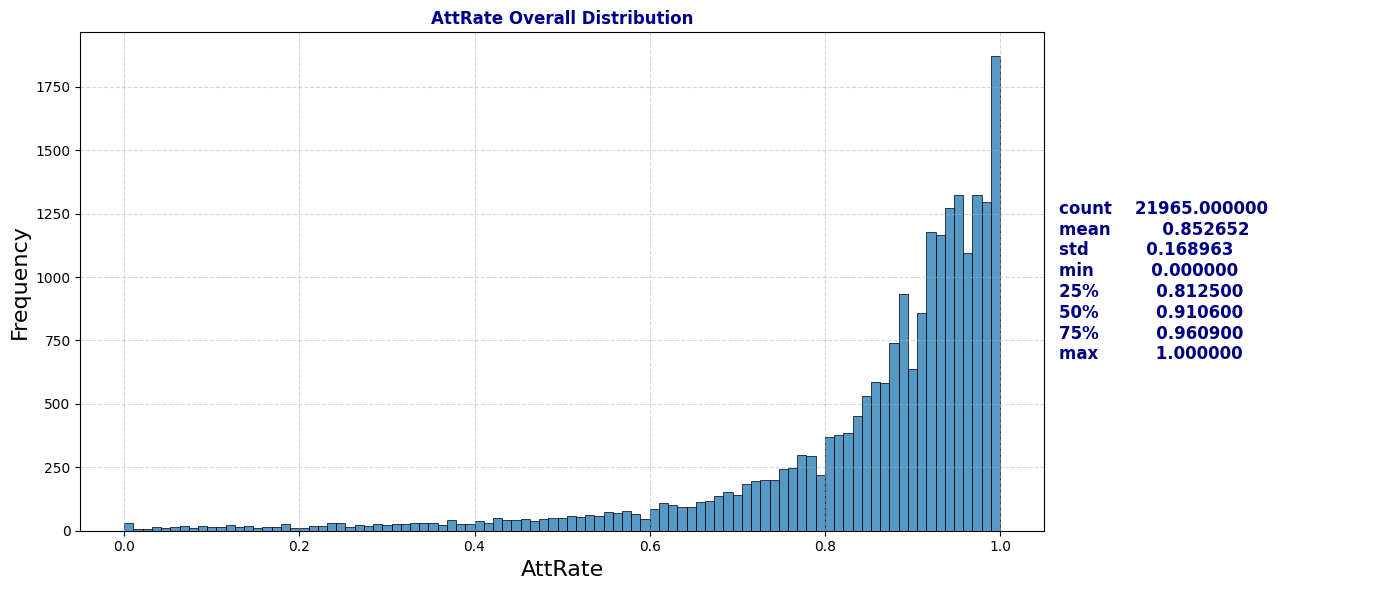

In [ ]:
def plot_distribution_and_summary(df, col, title=None):
    """
    Plots the distribution histogram and statistical summary for a specified column.

    Parameters:
    - df: DataFrame containing the data
    - col: str, the name of the column to plot and summarize
    - title: modified title for the plot
    """
    # Calculate the statistical summary for the specified column
    summary_stats = df[col].describe()

    # Set up a figure with 2 subplots: 1 for the plot, 1 for the text
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [3, 1]})

    # Plot the histogram for the specified column
    if title:
        ax1.set_title(title, fontweight='bold', color='darkblue')
    else:
        ax1.set_title(f'{col} Overall Distribution', fontweight='bold', color='darkblue')
    ax1.set_xlabel(f'{col}', fontsize=16)
    ax1.set_ylabel('Frequency', fontsize=16)
    sns.histplot(data=df, x=col, ax=ax1)
    ax1.grid(True, linestyle='--', alpha=0.5)

    # Display the statistical summary on the right subplot
    ax2.axis('off')  # Turn off the axis for the text display
    summary_text = summary_stats.to_string()
    ax2.text(0, 0.5, summary_text, fontsize=12, va='center', ha='left', fontweight='bold', color='navy')

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Attendance Overall Distribution
plot_distribution_and_summary(schools, 'AttRate')

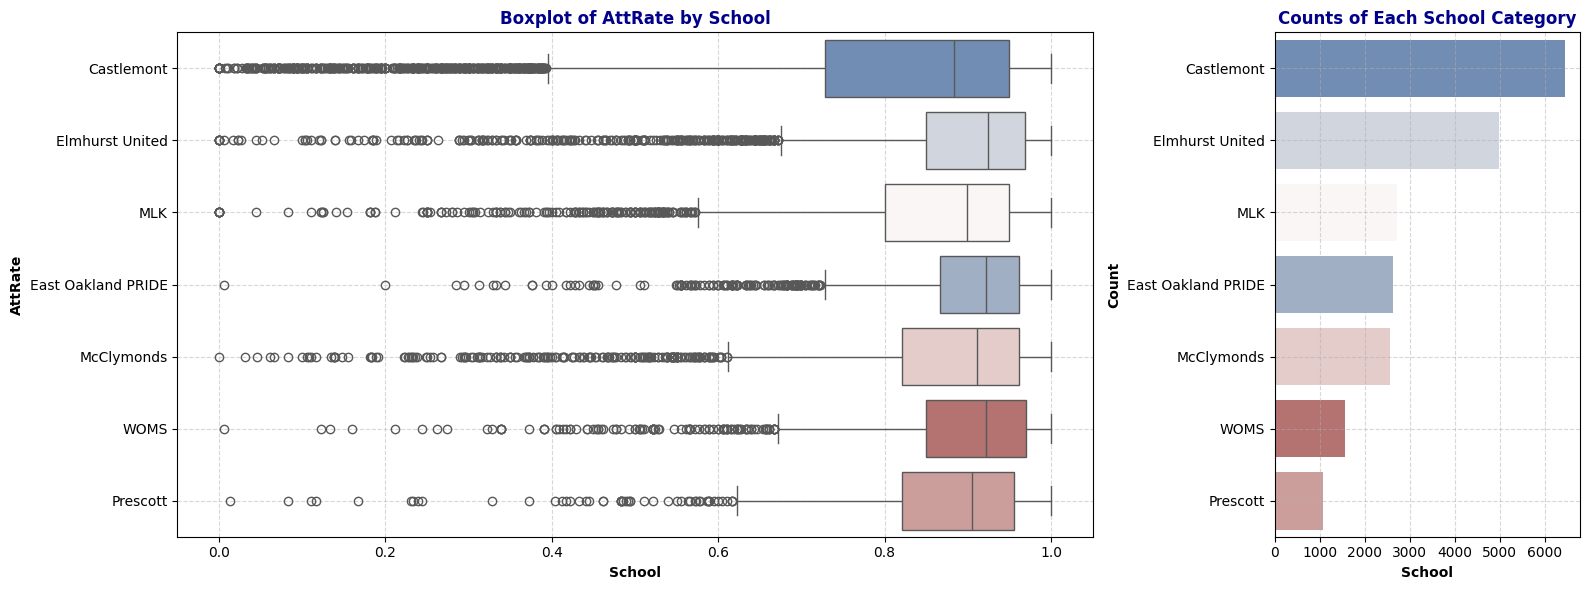

In [ ]:
def plot_boxplot_with_counts(df, numerical_col, categorical_col):
    """
    Plots a boxplot for a numerical column grouped by a categorical column
    along with the count of each category.

    Parameters:
    - df: DataFrame containing the data
    - numerical_col: str, the name of the numerical column to plot
    - categorical_col: str, the name of the categorical column to group by
    """

    # Define the category order based on the boxplot
    category_order = df[categorical_col].value_counts().index.tolist()

    # Set up the figure with two subplots: one for the boxplot and one for the bar plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [3, 1]})

    # Plot the boxplot for the numerical column by the categorical column
    sns.boxplot(data=df, y=categorical_col, x=numerical_col, ax=ax1, hue =categorical_col, palette="vlag", order=category_order)
    ax1.set_title(f'Boxplot of {numerical_col} by {categorical_col}', fontweight='bold', color='darkblue')
    ax1.set_xlabel(categorical_col, fontweight='bold')
    ax1.set_ylabel(numerical_col, fontweight='bold')
    ax1.grid(True, linestyle='--', alpha=0.5)

    # Plot the count of each category as a bar plot
    sns.countplot(data=df, y=categorical_col, order=category_order, ax=ax2, hue=categorical_col, palette='vlag')
    ax2.set_title(f'Counts of Each {categorical_col} Category', fontweight='bold', color='darkblue')
    ax2.set_xlabel(categorical_col, fontweight='bold')
    ax2.set_ylabel('Count', fontweight='bold')
    ax2.grid(True, linestyle='--', alpha=0.5)

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

# Attendance Distributions by School
plot_boxplot_with_counts(schools, 'AttRate', 'School')

Observation: The boxplot shows the distribution of attendance rates across different schools. Elmhurst United displays a higher median attendance rate while Castlemont has the lowest median attendance rate with largest variability. Note that Castlemont also has the highest number of data among other schools.

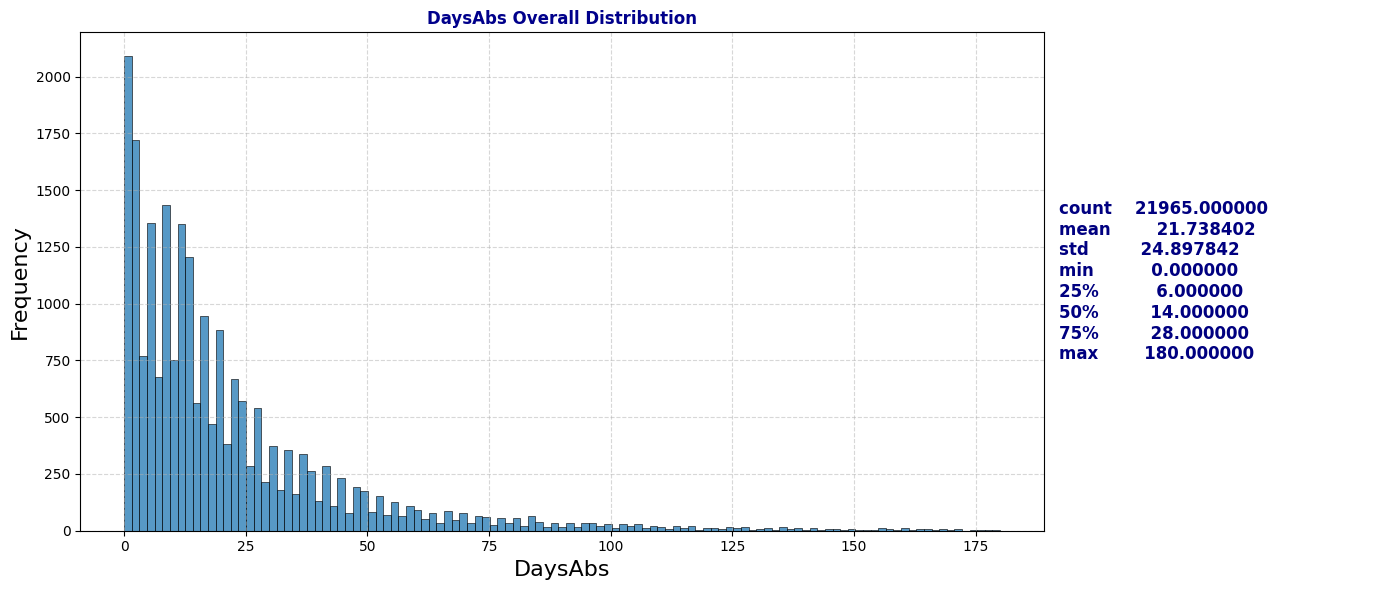

In [ ]:
# Days Absent Overall Distribution
plot_distribution_and_summary(schools, 'DaysAbs')

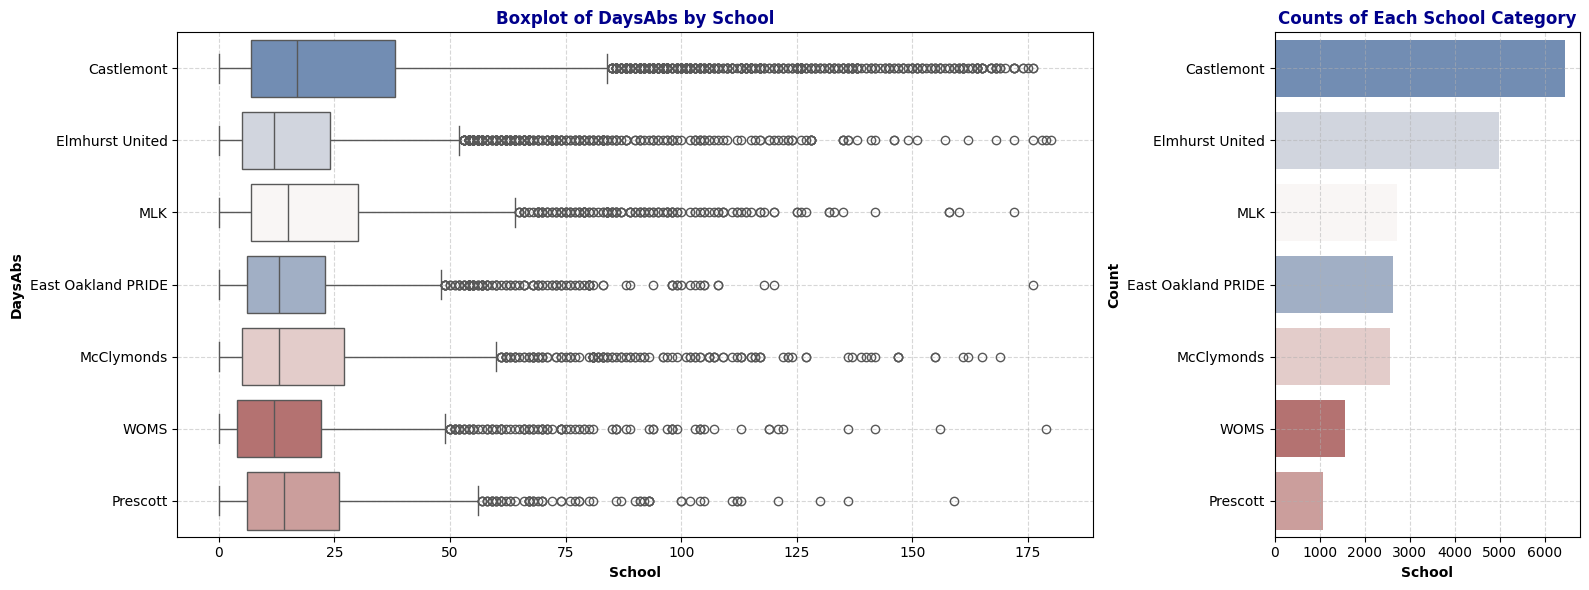

In [ ]:
# Days Absent Distribution by School
plot_boxplot_with_counts(schools, 'DaysAbs', 'School')

Observation: The distribution of Days Absent closely mirrors that of Attendance Rate, indicating a strong dependency between the two. We can consider dropping the DaysAbs column later to avoid redundancy.

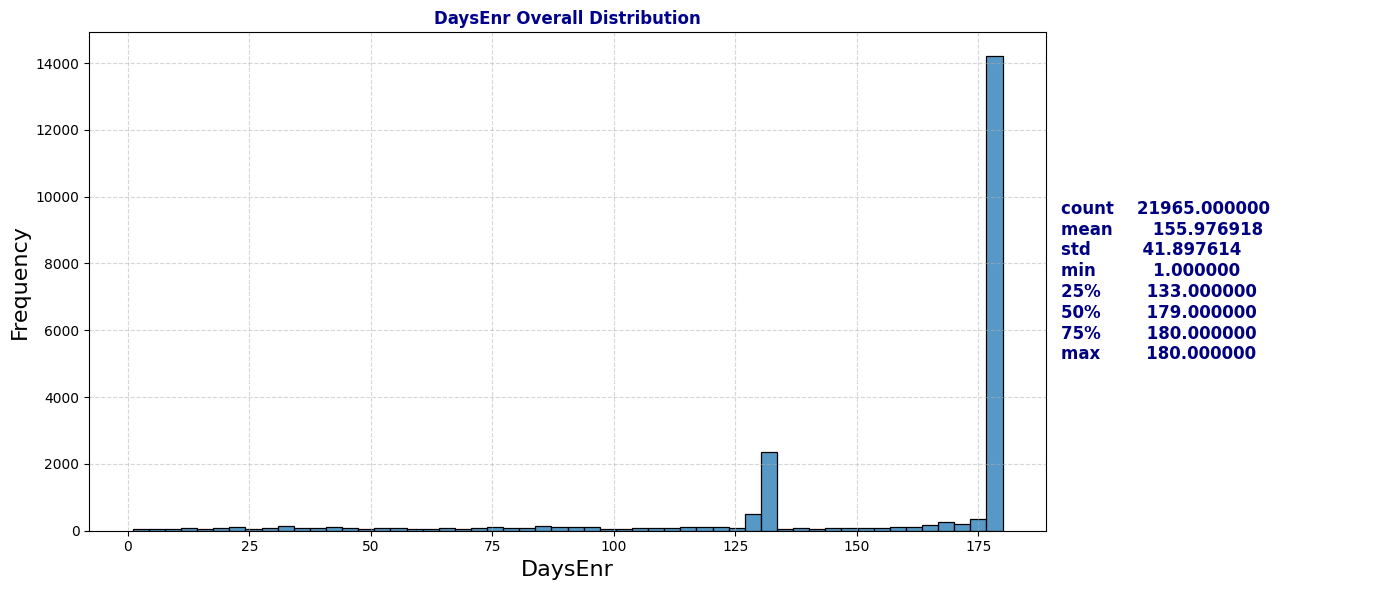

In [ ]:
# Days Enrolled Overall Distribution
plot_distribution_and_summary(schools, 'DaysEnr')

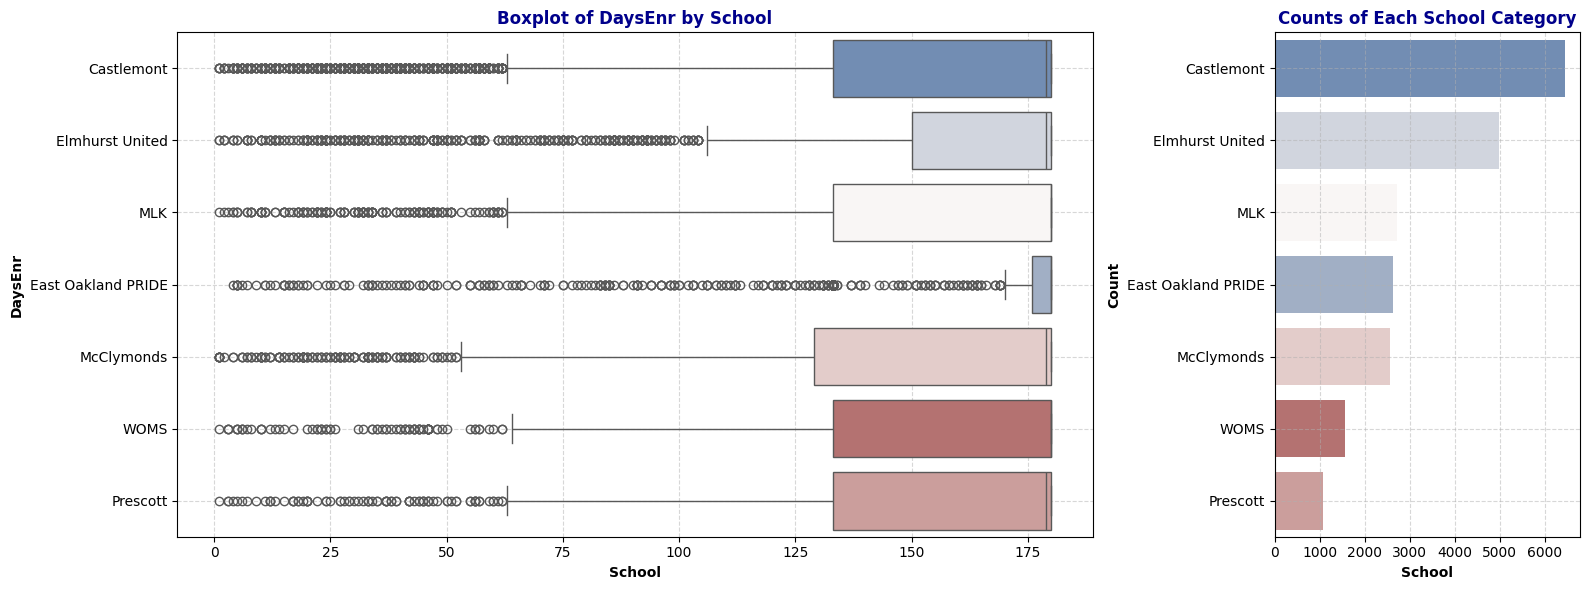

In [ ]:
# Days Enrolled Distribution by School
plot_boxplot_with_counts(schools, 'DaysEnr', 'School')

Observation: The Days Enrolled column contains numerous unusually low values. This raises questions about the underlying causes (further research on how schools report days enrolled may be necessary). We may also need to reconsider the definition of chronic absenteeism (where the ratio of days absent to days enrolled is greater than 10%), as low values for days enrolled could disproportionately impact the chronic absenteeism rate.

Key findings including:

- Most students have high attendance rates, though certain schools show significant absenteeism challenges.
- Variability in absenteeism and enrollment suggests that some schools might face systemic issues with student attendance and retention.
- The distribution of enrolled days highlights potential inconsistencies in data reporting, which could affect the accuracy of absenteeism measurements.

## 2b. Time Series over Year: Attendance Rate and Chronic Absenteeism Percentage

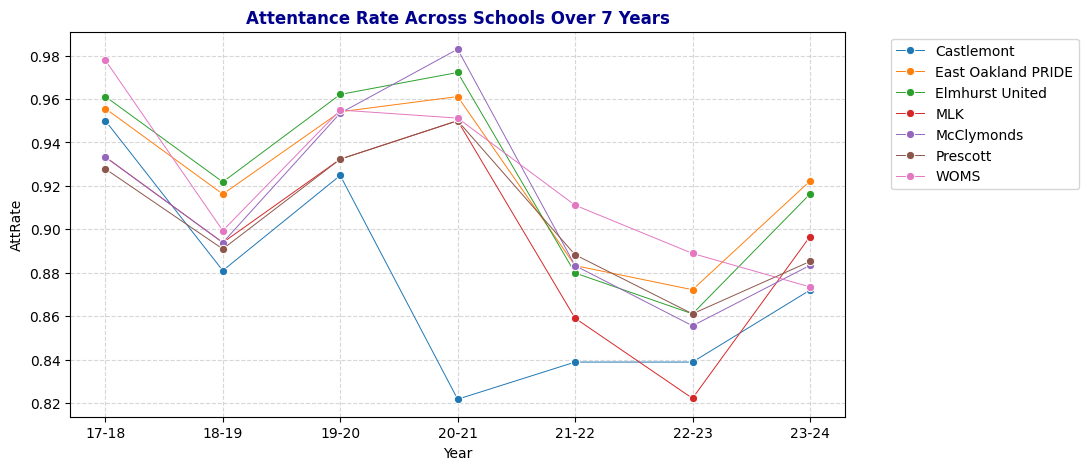

In [ ]:
# Time series plot for attendate rate, aggregating by median
plt.figure(figsize=(10, 5))
plt.title('Attentance Rate Across Schools Over 7 Years', fontweight='bold', color='darkblue')
sns.lineplot(data=schools, x='Year', y='AttRate', hue='School', estimator='median', errorbar=None,  marker='o', linewidth=0.7)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1));


### Dive deeper into MLK and Castlemont Attendance Rate Distribution

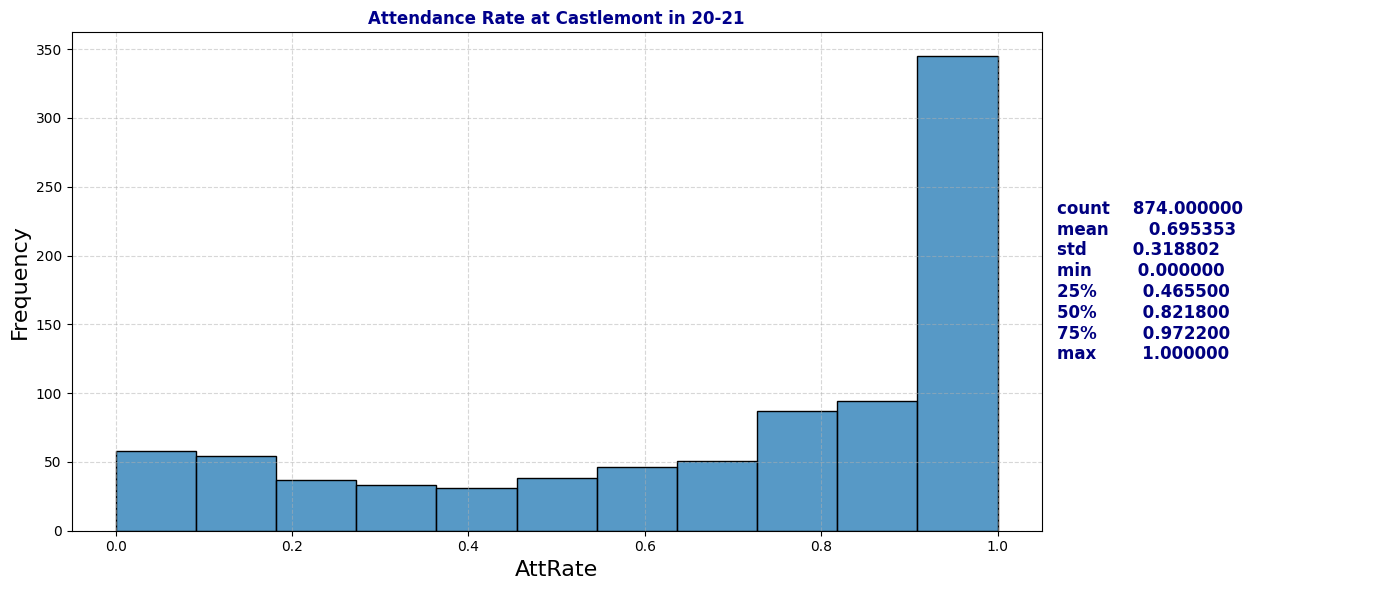

In [ ]:
# Examine attendance rate at Castlemont, espcially year 20-21
plot_distribution_and_summary(schools[(schools['School'] == 'Castlemont') & (schools['Year'] == '20-21')], 'AttRate', "Attendance Rate at Castlemont in 20-21")

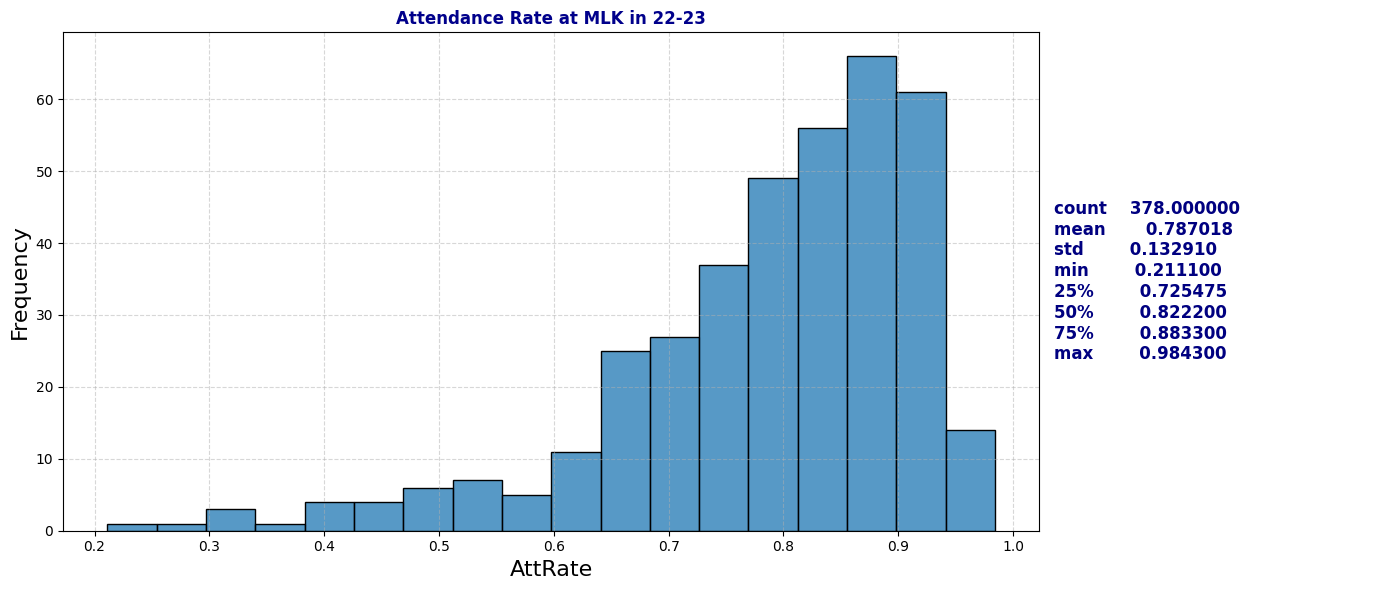

In [ ]:
# Examine attendance rate at MLK, espcially year 22-23
plot_distribution_and_summary(schools[(schools['School'] == 'MLK') & (schools['Year'] == '22-23')], 'AttRate', "Attendance Rate at MLK in 22-23")

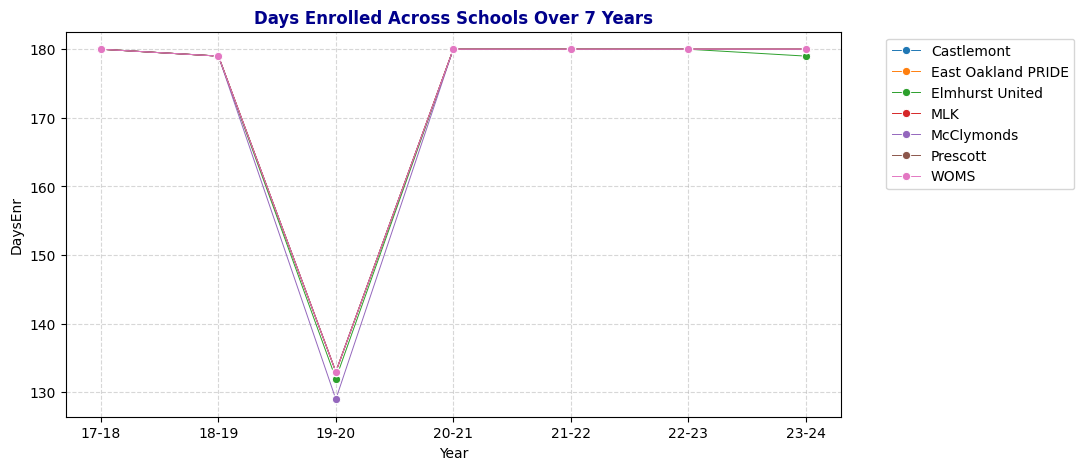

In [ ]:
# Time series plot for Days Enrolled, aggregating by median
plt.figure(figsize=(10, 5))
plt.title('Days Enrolled Across Schools Over 7 Years', fontweight='bold', color='darkblue')
sns.lineplot(data=schools, x='Year', y='DaysEnr', hue='School', estimator='median', errorbar=None,  marker='o', linewidth=0.7)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True, linestyle='--', alpha=0.5);


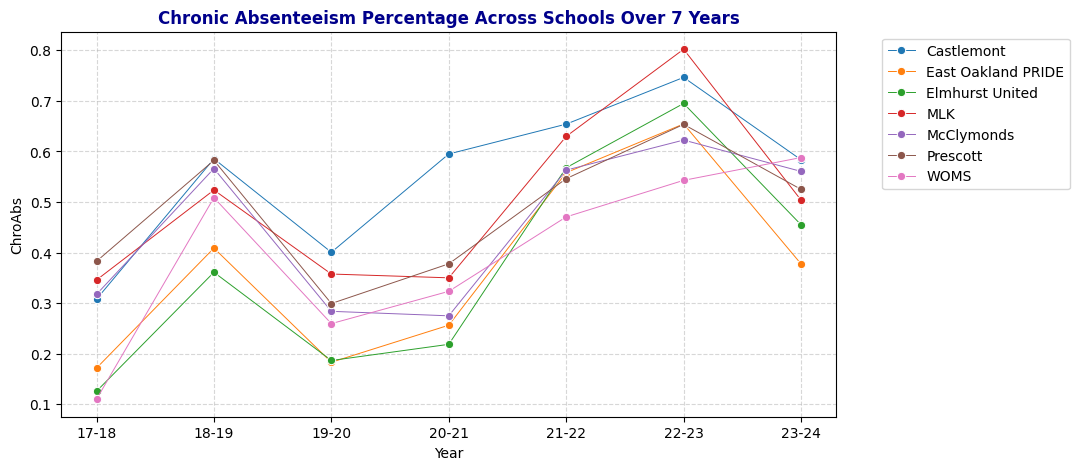

In [ ]:
# ChronicAbsent Percentage by Year
plt.figure(figsize=(10, 5))
plt.title('Chronic Absenteeism Percentage Across Schools Over 7 Years', fontweight='bold', color='darkblue')
sns.lineplot(data=schools, x='Year', y='ChroAbs', hue='School', estimator='mean', errorbar=None,  marker='o', linewidth=0.7)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True, linestyle='--', alpha=0.5);

Quick observation: Even though 19-20 has lowest median days enrolled but the percentage of chronically absent student are under 40%. School years 21-22 and 22-23 have high chronic absenteeism percentage.

Key Findings:

- Attendance Trends: Attendance rates fluctuated over the seven-year period, with notable
declines during the 2018-19 and 2021-22 school years. These dips, particularly during the pandemic years, indicate district-wide challenges in maintaining student engagement.
- Days Enrolled: Enrollment days remained stable at around 180 for most years, except for a sharp drop in 2019-20, indicating potential mid-year closures or interruptions.
- Castlemont-Specific Challenges: Castlemont consistently displayed lower attendance rates and higher chronic absenteeism, especially in 2020-21, signaling a need for targeted interventions. The school’s unique struggles may be due to underlying socio-economic conditions, resource gaps, or other external factors.

## 2c. Demographic Factors: Gender, Ethnicity, Fluency, Special Education and Socio-economically Disadvantaged Status

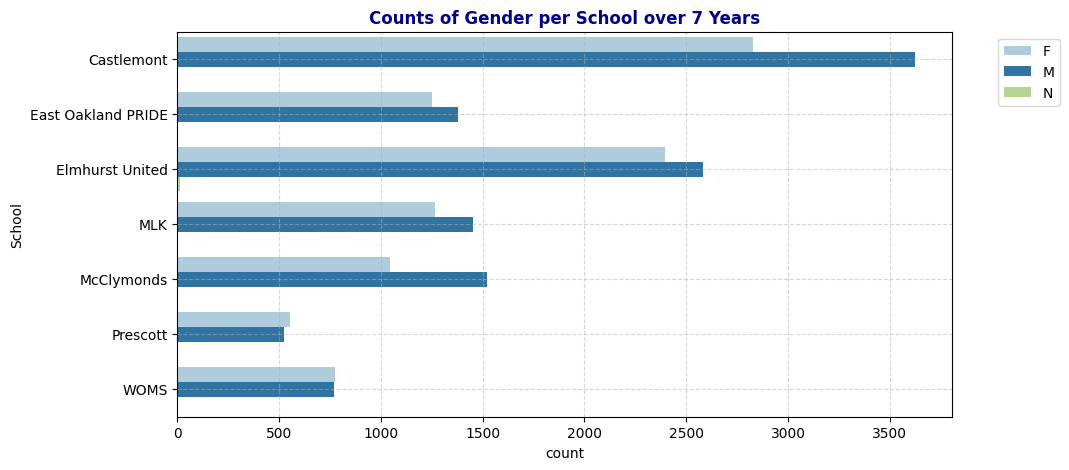

In [ ]:
def plot_bar(df, col, title=None):
    """
    Plots a bar chart for a specified column.

    Parameters:
    - df: DataFrame containing the data
    - col: str, the name of the column to plot
    - title: modified title for the plot
    """
    plt.figure(figsize=(10, 5))
    if title:
        plt.title(title, fontweight='bold', color='darkblue')
    else:
        plt.title(f'Counts of {col} per School over 7 Years', fontweight='bold', color='darkblue')
    sns.countplot(data=df, y='School', hue=col, palette='Paired')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
    plt.show()

# Bar plot of Gender per School
plot_bar(schools, 'Gen', "Counts of Gender per School over 7 Years")

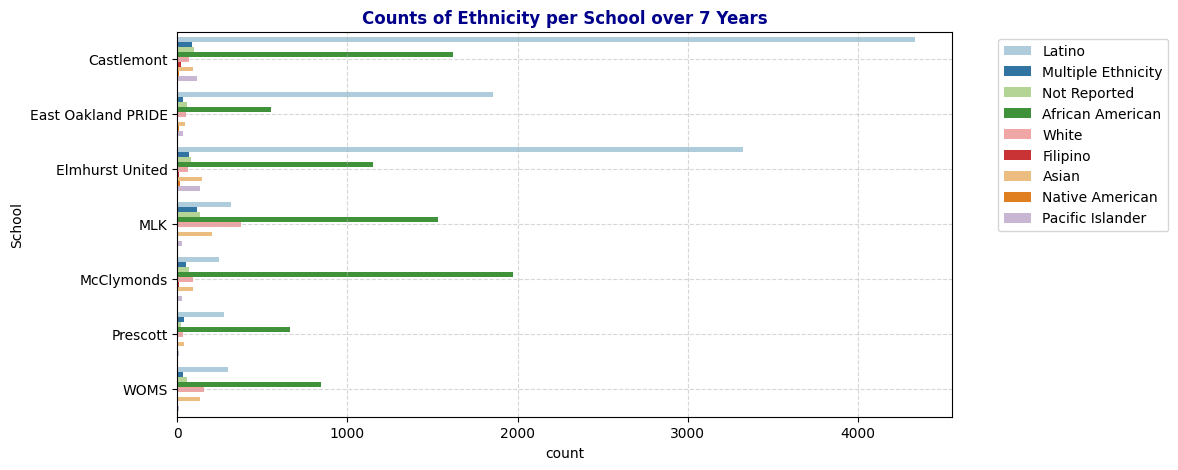

In [ ]:
# Bar plot of Ethnicity per School
plot_bar(schools, 'Eth', "Counts of Ethnicity per School over 7 Years")

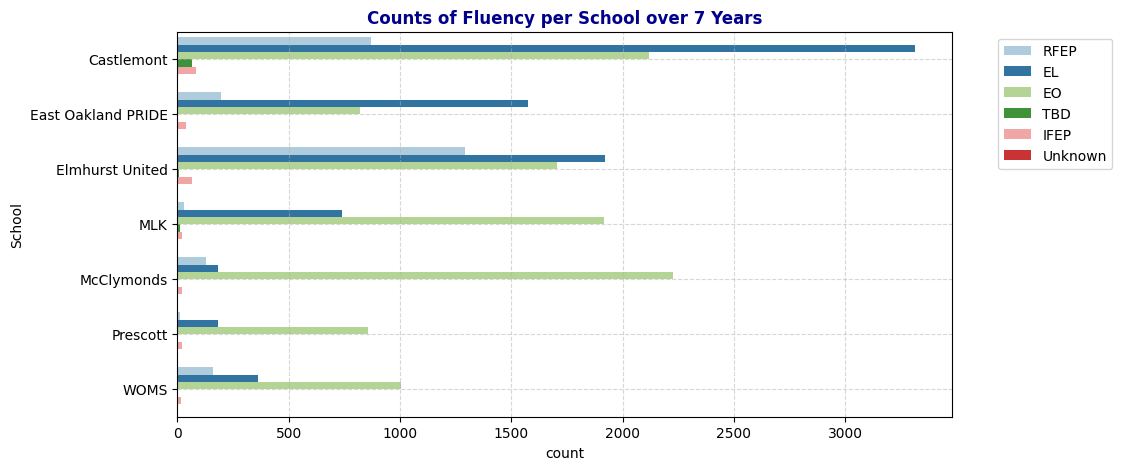

In [ ]:
# Bar plot of Fluency per School
plot_bar(schools, 'Fluency')

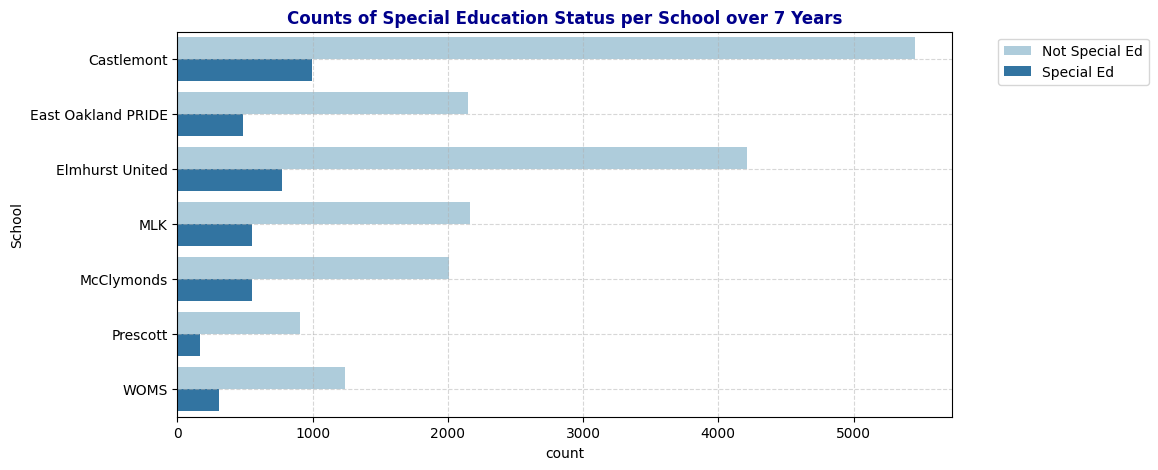

In [ ]:
# Bar plot of Special Education per School
plot_bar(schools, 'SpEd', "Counts of Special Education Status per School over 7 Years")

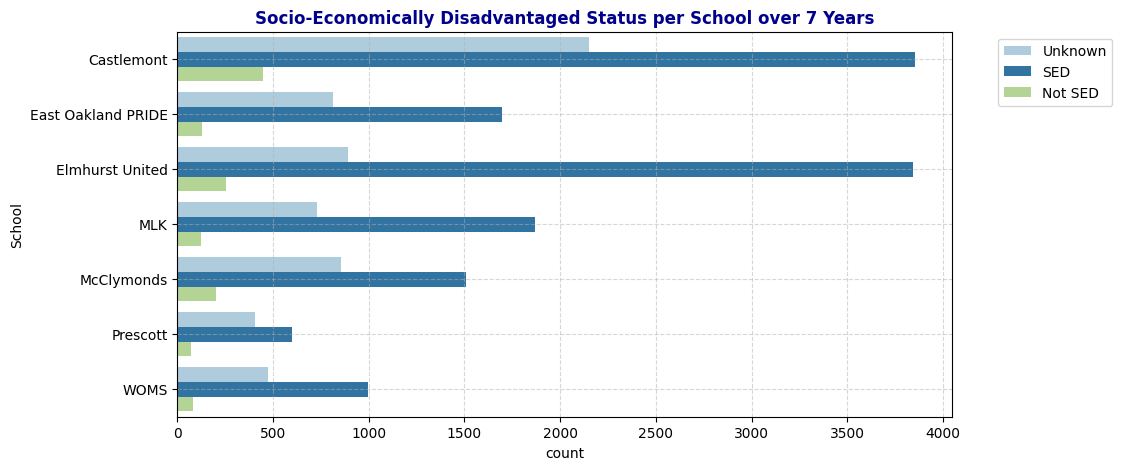

In [ ]:
# Bar plot of Socio-Economically Disadvantaged Counts per school
plot_bar(schools, 'SED', "Socio-Economically Disadvantaged Status per School over 7 Years")

Key Findings:

- Gender Distribution: Most schools have a balanced distribution of male and female students,
with Castlemont having the highest overall student count. The presence of a small number of
"N" (likely representing non-binary or not reported) entries suggests that some schools are starting to account for gender diversity beyond the binary categories.
- Ethnic Diversity: African American and Latino students make up the majority across most schools, but their proportions vary significantly. Castlemont, East Oakland PRIDE, and Elmhurst United have a higher concentration of Latino students, while the rest have more African American students. Smaller ethnic groups, such as Pacific Islanders and Native Americans, are underrepresented, which may affect certain analyses if not accounted for properly.
- Language Fluency: English Only (EO) students dominate in all schools, particularly in MLK, McClymonds, Prescott, and WOMS. English Learners (EL) and Reclassified Fluent English Proficient (RFEP) are also significant, especially in Castlemont, East Oakland PRIDE, and Elmhurst United.
- Special Education (SpEd): A considerable number of students in each school are enrolled in special education programs, with Castlemont and Elmhurst United having the highest counts. However, the majority of students across all schools are classified as Not Special Ed. This distribution provides insights into the varied support needs within each school.
- Socio-Economically Disadvantaged (SED) Status: High counts of SED students are evident in all schools, indicating economic challenges in these communities. A large number of "Unknown" entries, particularly in Castlemont, may obscure true socio-economic trends and should be considered when analyzing the impact of SED on student outcomes.

# Heat Map

### Numerical Data: Pearson's Correlation to Visualize Linear Relationship of Each Pair.

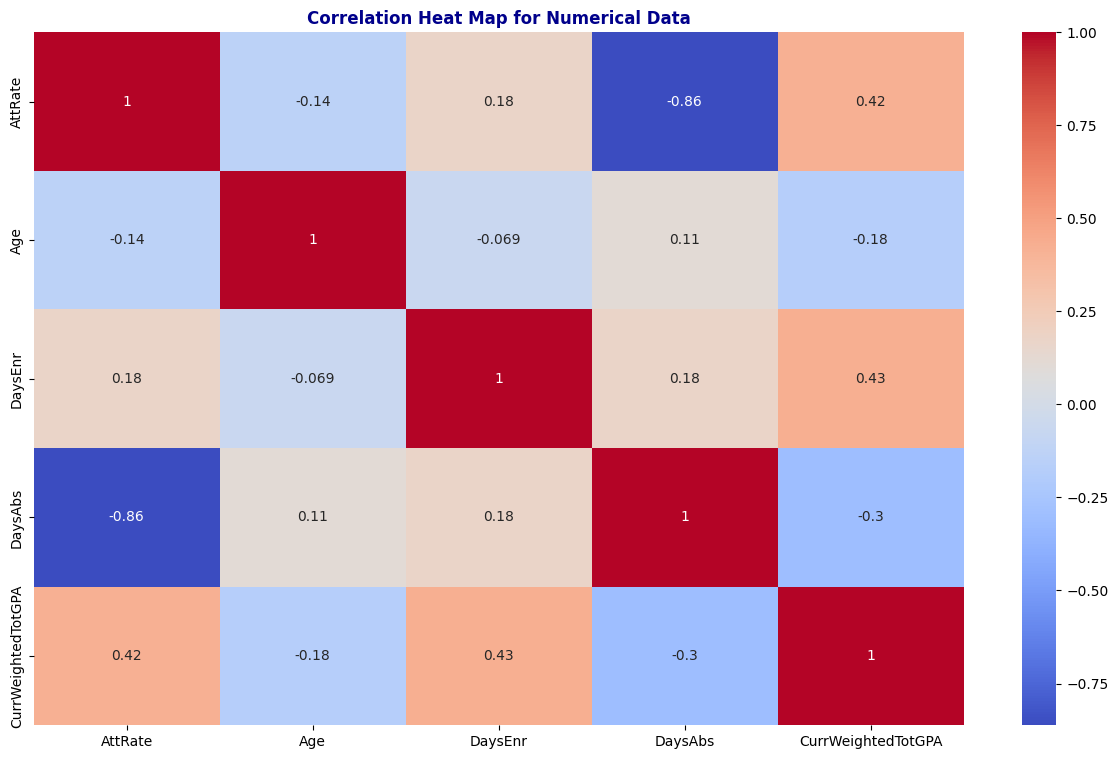

In [ ]:
def plot_corr(cols):
  corr_df = schools[cols]
  corr_df.corr()
  plt.figure(figsize=(15, 9))
  sns.heatmap(corr_df.corr(), cmap='coolwarm', annot=True)
  plt.title(f'Correlation Heat Map for Numerical Data', fontweight='bold', color='darkblue');

# Numerical data for correlation map
corr_cols = ['AttRate', 'Age', 'DaysEnr', 'DaysAbs', 'CurrWeightedTotGPA']
plot_corr(corr_cols)

Observation: Pairs that has high correlation

- DaysAb and AttRate: This pair exhibits a high correlation due to their inherent dependency. Days absent (DaysAbs) is inversely related to attendance rate (AttRate), as a higher number of absences naturally lowers the attendance rate. This dependency is expected and reflects how these two variables capture similar information.
- DaysEnr and CurrWeightedTotGPA: There is a moderate positive linear relationship between days enrolled (DaysEnr) and cumulative GPA (CurrWeightedTotGPA), with a correlation of 0.43. While this shows that students enrolled for more days tend to have a higher GPA, this relationship is not directly relevant to our analysis of chronic absenteeism and may not be a primary focus.
- AttRate and CurrWeightedTotGPA: There is a positive linear relationship between attendance rate (AttRate) and GPA, with a correlation of 0.42. This suggests that better attendance is associated with higher academic performance, which aligns with the understanding that consistent attendance is beneficial for student success. This relationship is worth investigating further, as it may provide insights into how attendance impacts academic outcomes and possibly influences chronic absenteeism.


### Categorical Correlations: Using Theil's U to Visualize Predictive Strength between Two Categorical Variables

Theil's U is used to assess the relationship between categorical variables, offering insights into how one categorical variable can predict another. Theil's U values range from 0 to 1, where 0 indicates no predictive power and 1 indicates perfect predictability. It’s important to note that Theil's U is asymmetric, meaning the predictive power of variable A on variable B is not necessarily the same as the predictive power of B on A. This characteristic allows for a more nuanced understanding of relationships between categorical variables, where directionality matters.

For more details on Theil's U and its applications in evaluating categorical correlation, refer to this article: [The Search for Categorical Correlation.](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9)

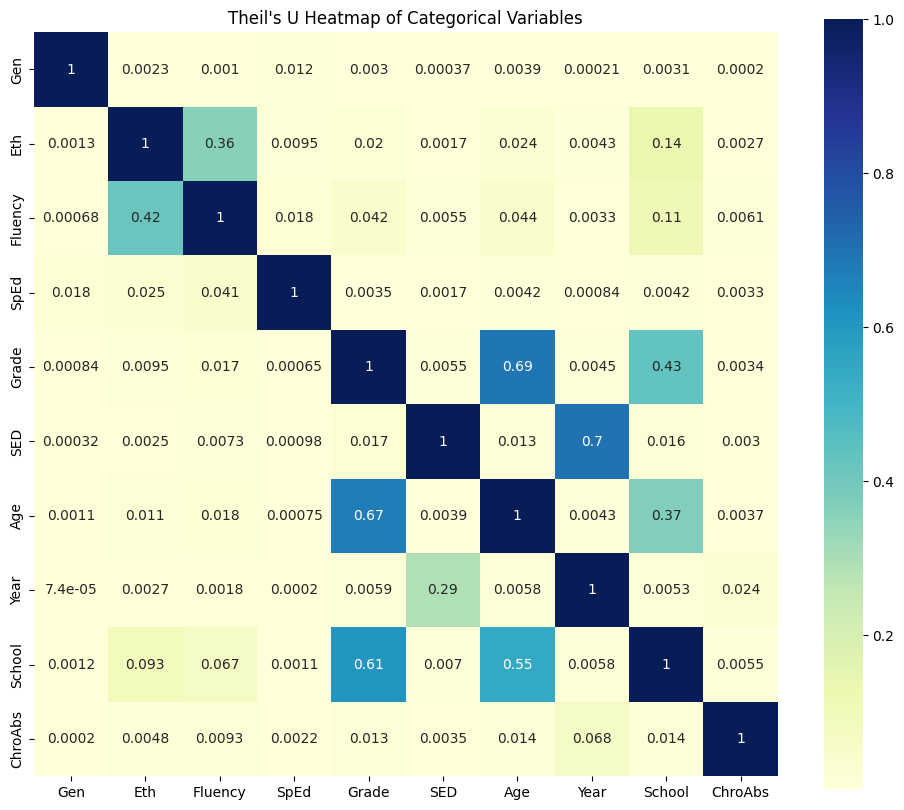

In [ ]:
# Theil'U Heat Map for Categorical Variable
from collections import Counter
import math

# Define Theil's U Calculation Function
def conditional_entropy(x, y):
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x, y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0.0
    for xy, xy_count in xy_counter.items():
        p_xy = xy_count / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y / p_xy)
    return entropy

def theils_u(x, y):
    s_xy = conditional_entropy(x, y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = [x_count / total_occurrences for x_count in x_counter.values()]
    s_x = -sum([p * math.log(p) for p in p_x])
    return (s_x - s_xy) / s_x if s_x != 0 else 1
cat_cols = ['Gen', 'Eth', 'Fluency', 'SpEd', 'Grade', 'SED', 'Age', 'Year', 'School', 'ChroAbs']

# Create an empty DataFrame to store Theil's U values
theils_u_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)

# Fill the matrix with Theil's U values
for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 == col2:
            theils_u_matrix.loc[col1, col2] = 1  # Perfect association with itself
        else:
            theils_u_matrix.loc[col1, col2] = theils_u(schools[col1], schools[col2])

# Convert to float for heatmap compatibility
theils_u_matrix = theils_u_matrix.astype(float)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(theils_u_matrix, annot=True, cmap="YlGnBu", square=True)
plt.title("Theil's U Heatmap of Categorical Variables")
plt.show()

Observation:
The factors with the strongest predictive power on Chronic Absenteeism are ranked as follows: Year > School > Age > Grade > Fluency > Ethnicity > SED > SpEd > Gender.

Additionally, the map shows that Grade has a strong predictive relationship with both School and Age (correlations of 0.81 and 0.67, respectively). This is logical, as schools are divided into levels (e.g., Elementary, Middle, High School), each covering specific grade ranges. Similarly, students are typically placed in grades based on their age. This alignment is reflected in the fact that these three variables—Grade, School, and Age—have similar correlation values with Chronic Absenteeism, indicating they offer comparable predictive power for absenteeism. Therefore, when building a predictive model, it may be beneficial to select only one of these variables to avoid redundancy and reduce model complexity.

Another noteworthy observation is the moderate predictive power of SED on Year (0.29), while Year has a stronger predictive power on SED (0.7). Further investigation is needed to understand the underlying reasons for this relationship.

# 3. Data Cleaning

##3a. Handle Missing Values

In [ ]:
schools.isna().sum()

,0
ANON_ID,0
Birthdate,0
Gen,0
Eth,0
Fluency,0
SpEd,0
Grade,0
AttRate,29
DaysEnr,29
DaysAbs,29


We need to handle misisng values in columns `AttRate`,`DaysEnr`, `DaysAbs`,`Susp`, and `CurrWeightedTotGPA`

**Suspension**: Fill all missing values with 0, as students with no suspension records from schools are assumed to have none.

In [ ]:
schools_cleaned = schools.copy()

In [ ]:
schools_cleaned['Susp'] = schools_cleaned['Susp'].fillna(0)
schools_cleaned.isna().sum()

,0
ANON_ID,0
Birthdate,0
Gen,0
Eth,0
Fluency,0
SpEd,0
Grade,0
AttRate,29
DaysEnr,29
DaysAbs,29


**AttRate, DaysEnr, and Days Abs**: Some students have records for the following year, meaning missing values for these fields are likely from newly enrolled students. Some students appear only once, suggesting they did not stay enrolled the following year. Since the percentage of these students per school is low, drop those rows with missing values in these columns, as they do not provide meaningful information and do not significantly impact the overall dataset.

In [ ]:
# Look at 29 students with NaN Values in AttRate, DaysEnr, and DaysAbs and how many times they appear in the dataset
ids = schools_cleaned[schools_cleaned['DaysEnr'].isnull()]['ANON_ID'].unique()
schools_cleaned[schools_cleaned['ANON_ID'].isin(ids)]['ANON_ID'].value_counts()

,count
ANON_ID,
46788,3
74073,3
74195,3
45261,3
23826,3
76869,3
76885,3
67766,2
11215,2


In [ ]:
# Look at one student
schools_cleaned[schools_cleaned['ANON_ID'] == 74195]

,ANON_ID,Birthdate,Gen,Eth,Fluency,SpEd,Grade,AttRate,DaysEnr,DaysAbs,Susp,CurrWeightedTotGPA,SED,School,Year,Age,ChroAbs
2855,74195,2004-10-26,M,Latino,RFEP,Not Special Ed,10,NaN,NaN,NaN,0.0,0.00,SED,Castlemont,19-20,15,0
3737,74195,2004-10-26,M,Latino,RFEP,Not Special Ed,11,0.2333,180.0,138.0,0.0,0.00,SED,Castlemont,20-21,16,1
4621,74195,2004-10-26,M,Latino,RFEP,Not Special Ed,12,0.5056,180.0,89.0,0.0,1.75,SED,Castlemont,21-22,17,1


In [ ]:
# Percentage of missing values with respect to school
schools_cleaned.groupby('School')['AttRate'].apply(lambda x: x.isna().mean())

,AttRate
School,
Castlemont,0.002169
East Oakland PRIDE,0.001519
Elmhurst United,0.000401
MLK,0.001103
McClymonds,0.001949
Prescott,0.000000
WOMS,0.000645


In [ ]:
# Drop the rows with those missing values of AttRate, DaysEnrolled, DaysAbs
schools_cleaned.dropna(subset=['AttRate', 'DaysEnr', 'DaysAbs'], inplace=True)
schools_cleaned.isna().sum()

,0
ANON_ID,0
Birthdate,0
Gen,0
Eth,0
Fluency,0
SpEd,0
Grade,0
AttRate,0
DaysEnr,0
DaysAbs,0


### **CurrWeightedTotGPA**:  
All records for grades -1 through 5 have missing values in the GPA column, with a small percentage of missing values also present for grades 9, 10, and 11. Given the strong correlation between GPA and Absent Rate, as shown in the correlation heatmap in section 2, it’s essential to retain this column in a way that minimizes noise. We cannot assign a numerical GPA to records in grades -1 to 5, as arbitrary values could misrepresent GPA meaningfully.

To address this, I propose creating a new variable, Academic Status, which categorizes GPA into four levels:

Good: GPA ≥ 3.0
Average: 2.0 ≤ GPA < 3.0
At Risk: GPA < 2.0
Unknown: GPA is NaN

After creating Academic Status, we can drop the GPA column and explore the relationship between this new variable and the response variable, ChroAbs.

In [ ]:
#Percentage of missing GPA in each grade
schools.groupby('Grade')['CurrWeightedTotGPA'].apply(lambda x: x.isna().mean())

,CurrWeightedTotGPA
Grade,
-1,1.000000
0,1.000000
1,1.000000
2,1.000000
3,1.000000
4,1.000000
5,1.000000
6,0.000000
7,0.000000


In [ ]:
# Define a function to categorize academic status based on the given criteria
def categorize_academic_status(gpa):
    if pd.isna(gpa):
        return "Unknown"
    elif gpa >= 3.0:
        return "Good"
    elif 2.0 <= gpa < 3.0:
        return "Average"
    else:
        return "AtRisk"

# Apply the function to create a new column 'AcademicStatus'
schools_cleaned['AcademicStatus'] = schools_cleaned['CurrWeightedTotGPA'].apply(categorize_academic_status)
schools_cleaned.drop(columns=['CurrWeightedTotGPA'], inplace=True)
schools_cleaned.head()

,ANON_ID,Birthdate,Gen,Eth,Fluency,SpEd,Grade,AttRate,DaysEnr,DaysAbs,Susp,SED,School,Year,Age,ChroAbs,AcademicStatus
0,338,2003-07-21,F,Latino,RFEP,Not Special Ed,9,0.9889,180.0,2.0,0.0,Unknown,Castlemont,17-18,14,0,Good
1,340,2003-03-31,M,Latino,EL,Not Special Ed,9,0.8389,180.0,29.0,2.0,Unknown,Castlemont,17-18,14,1,AtRisk
2,478,2003-09-06,F,Multiple Ethnicity,EO,Special Ed,9,0.7263,179.0,49.0,1.0,Unknown,Castlemont,17-18,14,1,AtRisk
3,686,2000-04-02,M,Latino,EL,Not Special Ed,12,0.9611,180.0,7.0,0.0,Unknown,Castlemont,17-18,17,0,Average
4,693,2002-03-28,F,Latino,RFEP,Not Special Ed,10,0.9889,180.0,2.0,0.0,SED,Castlemont,17-18,15,0,Average


In [ ]:
schools_cleaned.isna().sum()

,0
ANON_ID,0
Birthdate,0
Gen,0
Eth,0
Fluency,0
SpEd,0
Grade,0
AttRate,0
DaysEnr,0
DaysAbs,0


### Missing Values: Before and After

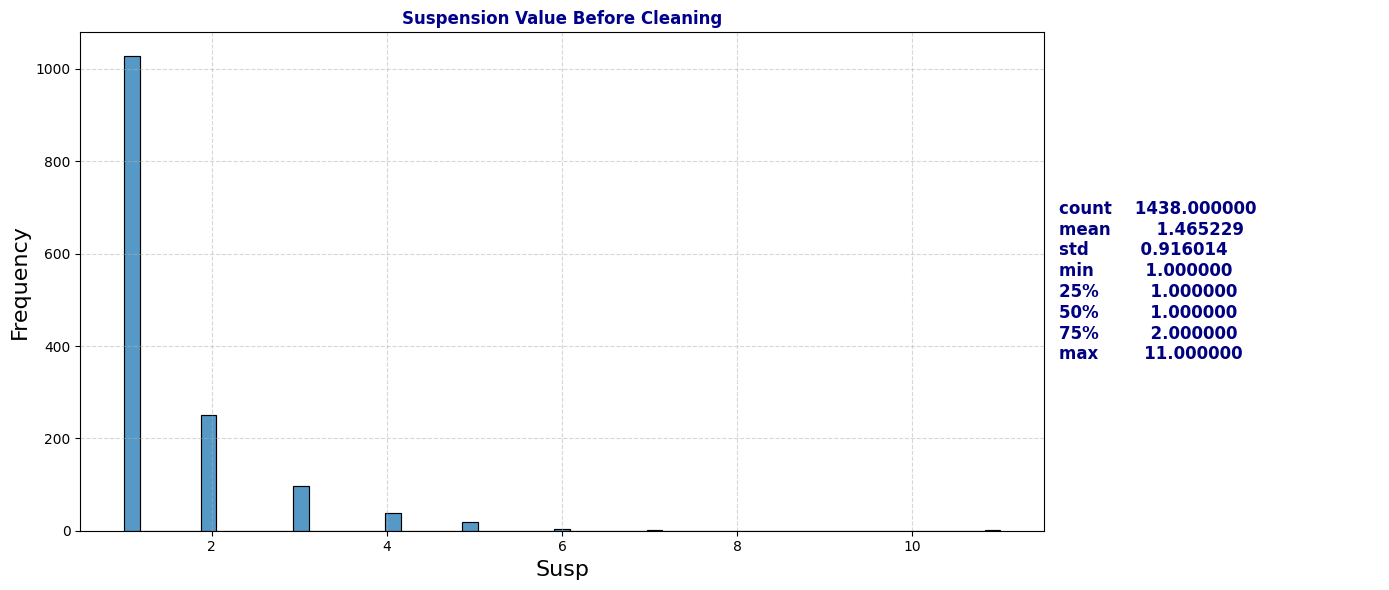

In [ ]:
# Suspension value before and after
plot_distribution_and_summary(schools, 'Susp', "Suspension Value Before Cleaning")

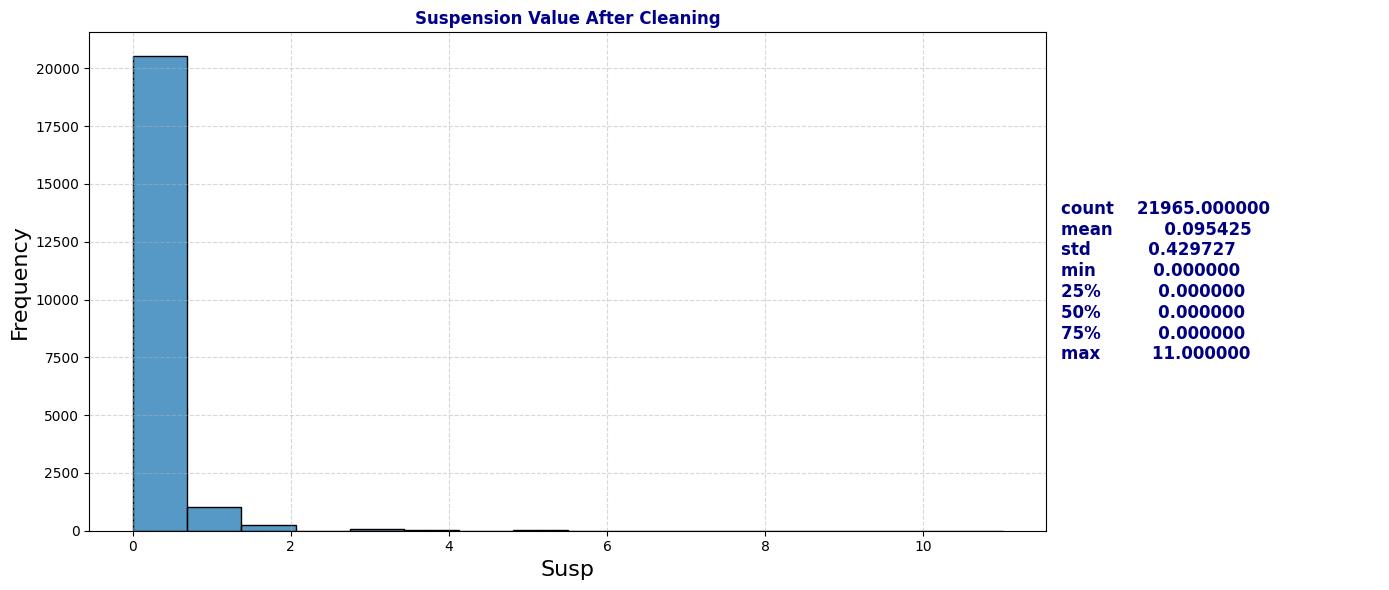

In [ ]:
plot_distribution_and_summary(schools_cleaned, 'Susp', "Suspension Value After Cleaning")

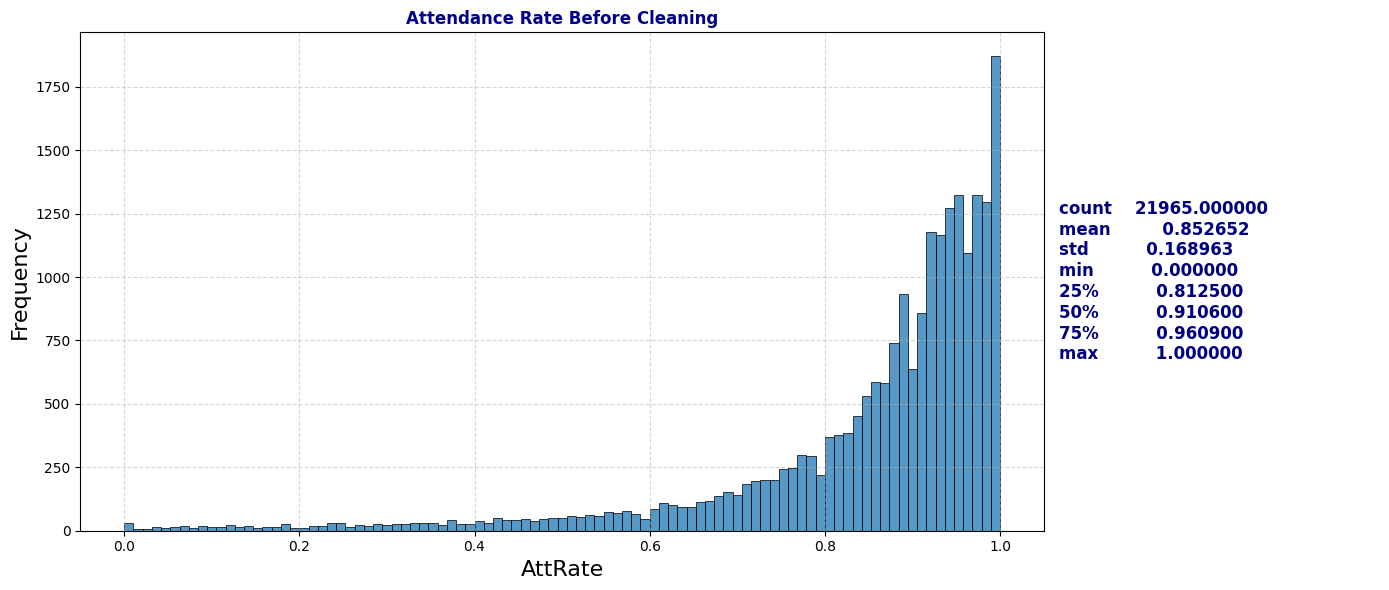

In [ ]:
# Attendance Rate Before Cleaning
plot_distribution_and_summary(schools, 'AttRate', "Attendance Rate Before Cleaning")

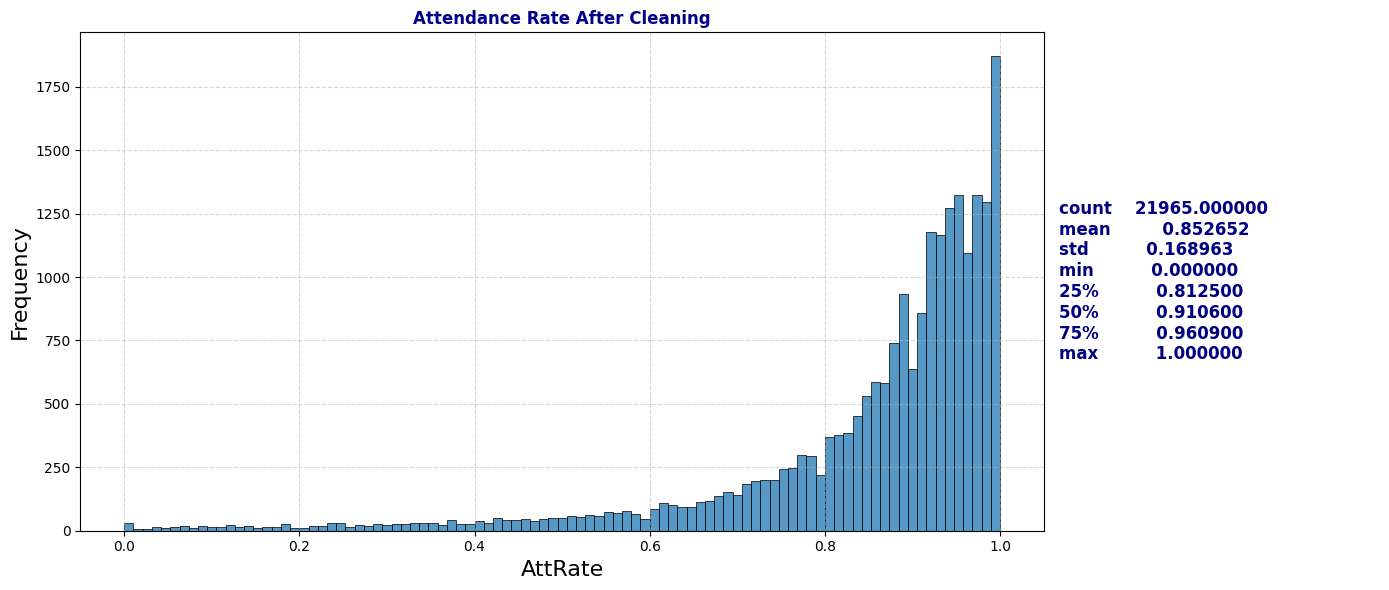

In [ ]:
# Attendance Rate After Cleaning
plot_distribution_and_summary(schools_cleaned, 'AttRate', "Attendance Rate After Cleaning")

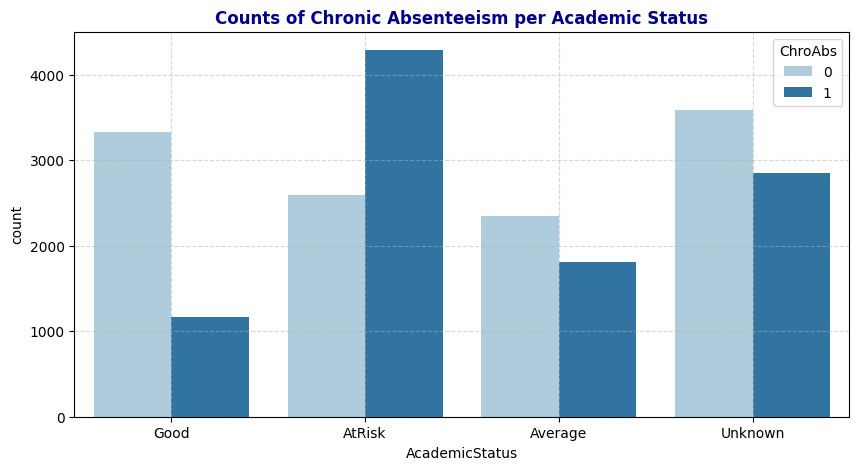

In [ ]:
# Visualize Chronic Absenteeism by Academic Status
plt.figure(figsize=(10, 5))
plt.title('Counts of Chronic Absenteeism per Academic Status' ,fontweight='bold', color='darkblue')
sns.countplot(data=schools_cleaned, x='AcademicStatus', hue='ChroAbs', palette='Paired')
plt.grid(True, linestyle='--', alpha=0.5);

Summarization of Data Cleaning:

Suspension (Susp) had the highest proportion of missing values, with roughly 93% of entries lacking data. I filled these missing values with zeros, assuming that students with no suspension record had no suspensions.

For Current Weighted Total GPA (CurrWeightedTotGPA), All records for grades -1 through 5 have missing values in the GPA column, with a small percentage of missing values also present for
grades 9, 10, and 11. Given the strong correlation between GPA and Absent Rate, as shown in the correlation heatmap in Section 2, it’s essential to retain this column in a way that minimizes noise. We cannot assign a numerical GPA to records in grades -1 to 5, as arbitrary values could misrepresent GPA meaningfully. To address this, I propose creating a new variable, Academic Status, which categorizes GPA into four levels: Good: GPA ≥ 3.0, Average: 2.0 ≤ GPA < 3.0, At Risk: GPA < 2.0, and Unknown: GPA is NaN. After creating Academic Status, I drop the GPA column and explore the relationship between this new variable and the response variable, ChroAbs.

I also found missing entries in Attendance Rate (AttRate), Days Enrolled (DaysEnr), and Days Absent (DaysAbs), affecting about 0.1% of the dataset with 29 records each. Some students have
records for the following year, meaning missing values for these fields are likely from newly enrolled students. Some students appear only once, suggesting they did not stay enrolled the following year. Since the percentage of these students per school is low, drop those rows with missing values in these columns, as they do not provide meaningful information and do not significantly impact the overall dataset.

## 3b. Handle Duplicates and Irrelevant Data

In [ ]:
# Frequency of values in each categorical column

# Generate HTML for each column's value counts
html_output = "<div style='display: flex; flex-wrap: wrap;'>"

cat_cols = ['Gen', 'Eth', 'Fluency', 'SpEd', 'Grade', 'SED', 'Age', 'ChroAbs']
for col in cat_cols:
    # Get the value counts for the column
    counts = schools[col].value_counts()

    # Create an HTML table for the value counts of each column
    html_output += f"""
    <div style='margin-right: 20px; padding: 10px; border: 1px solid #ddd;'>
        <h4>{col}</h4>
        {counts.to_frame().to_html(header=False)}
    </div>
    """

html_output += "</div>"

# Display all counts side by side in HTML format
display(HTML(html_output))

Gen,
M,11857
F,10113
N,24
Eth,
Latino,10645
African American,8335
White,840
Asian,753
Not Reported,526
Multiple Ethnicity,424


### Gender: has one unsual value of 'm'. Modify it to "M"

In [ ]:
# Gender has one unsual value of 'm'. Modify it to "M"
schools['Gen'] = schools['Gen'].replace('m', 'M')
schools['Gen'].value_counts()

,count
Gen,
M,11857
F,10113
N,24


### **Fluency**:
There are 100 records labeled as `TBD` and 6 as` Unknown` in the Fluency column. Upon examining records with `TBD`, we find that these are primarily new enrollees. For students who reappear in subsequent years, their Fluency values are recorded in later years. Based on this insight, I fill Unknown or `TBD` entries in `Fluency` with matching values from other records with the same `ANON_ID`. After this process, 68 `TBD` and 2 `Unknown` entries remain, representing students who appear only once in the dataset—likely indicating that they did not re-enroll. Even though these students account for only 3% of the dataset, they still provide valuable information in other variables, such as Attendance Rate, SED, SpEd, etc. Therefore, I’ve decided to retain these records rather than dropping them. However, to simplify our model, I will consolidate TBD and Unknown into a single label, Unknown, in the Fluency column. This will help reduce model complexity while preserving the information these records offer.

In [ ]:
# Look at the records that have Unknown in Fluency
schools[schools['Fluency'] == 'Unknown']

,ANON_ID,Birthdate,Gen,Eth,Fluency,SpEd,Grade,AttRate,DaysEnr,DaysAbs,Susp,CurrWeightedTotGPA,SED,School,Year,Age,ChroAbs
4662,78297,2004-11-24,M,Latino,Unknown,Not Special Ed,10,0.9892,93.0,1.0,NaN,3.63,Not SED,Castlemont,21-22,17,0
4663,78298,2004-11-24,M,Latino,Unknown,Not Special Ed,10,0.9892,93.0,1.0,NaN,3.63,Not SED,Castlemont,21-22,17,0
5159,44057,2008-01-15,F,Latino,Unknown,Not Special Ed,9,0.5122,41.0,20.0,NaN,0.00,Unknown,Castlemont,22-23,14,1
12481,5911,2009-10-17,F,Latino,Unknown,Not Special Ed,7,0.7385,65.0,17.0,NaN,3.00,Unknown,Elmhurst United,22-23,13,1
15905,50958,2014-03-23,M,White,Unknown,Not Special Ed,1,0.9063,64.0,6.0,NaN,NaN,Not SED,MLK,21-22,7,0
20077,31810,2017-02-25,M,Not Reported,Unknown,Not Special Ed,-1,0.0833,12.0,11.0,NaN,NaN,SED,Prescott,21-22,4,1


In [ ]:
# Examine one student
schools[schools['ANON_ID'] == 78297]

,ANON_ID,Birthdate,Gen,Eth,Fluency,SpEd,Grade,AttRate,DaysEnr,DaysAbs,Susp,CurrWeightedTotGPA,SED,School,Year,Age,ChroAbs
4662,78297,2004-11-24,M,Latino,Unknown,Not Special Ed,10,0.9892,93.0,1.0,NaN,3.63,Not SED,Castlemont,21-22,17,0
5571,78297,2004-11-24,M,Latino,EL,Not Special Ed,11,0.9056,180.0,17.0,NaN,3.43,SED,Castlemont,22-23,18,0
6442,78297,2004-11-24,M,Latino,EL,Not Special Ed,12,0.8833,180.0,21.0,NaN,2.40,SED,Castlemont,23-24,19,1


In [ ]:
# Function to fill 'Unknown' or 'TBD' in 'Fluency' with matching 'ANON_ID' values
def fill_fluency(row):
    if row['Fluency'] in ['Unknown', 'TBD']:
        # Find the first non-null value of 'Fluency' for the same 'ANON_ID'
        matching_value = schools_cleaned[(schools_cleaned['ANON_ID'] == row['ANON_ID']) & (schools_cleaned['Fluency'].notna()) & (~schools_cleaned['Fluency'].isin(['Unknown', 'TBD']))]

        # If there is a match, return its 'Fluency' value; otherwise, return the original 'Fluency'
        if not matching_value.empty:
            return matching_value.iloc[0]['Fluency']
    return row['Fluency']

# Apply the function to the 'Fluency' column
schools_cleaned['Fluency'] = schools_cleaned.apply(fill_fluency, axis=1)

In [ ]:
schools_cleaned['Fluency'].value_counts()

,count
Fluency,
EO,10638
EL,8308
RFEP,2683
IFEP,266
TBD,68
Unknown,2


In [ ]:
print('Percentage of TBD and Unknown left in the dataset: ', 70/schools_cleaned.shape[0])

Percentage of TBD and Unknown left in the dataset:  0.0031868882312770315


In [ ]:
# Examine the students left with TBD values in Fluency
schools_cleaned[schools_cleaned['Fluency'] == 'TBD']

,ANON_ID,Birthdate,Gen,Eth,Fluency,SpEd,Grade,AttRate,DaysEnr,DaysAbs,Susp,CurrWeightedTotGPA,SED,School,Year,Age,ChroAbs
8,870,2000-12-23,M,Latino,TBD,Not Special Ed,9,0.8761,113.0,14.0,0.0,1.82,Unknown,Castlemont,17-18,17,1
52,3933,2002-12-27,F,Latino,TBD,Not Special Ed,9,0.9344,122.0,8.0,0.0,2.94,Unknown,Castlemont,17-18,15,0
53,3936,2002-11-16,M,Latino,TBD,Not Special Ed,9,0.9426,122.0,7.0,0.0,1.76,Unknown,Castlemont,17-18,15,0
201,14335,2000-03-04,M,Latino,TBD,Not Special Ed,9,0.6889,45.0,14.0,0.0,0.00,Unknown,Castlemont,17-18,17,1
251,17703,2001-01-22,M,Latino,TBD,Not Special Ed,9,1.0000,9.0,0.0,0.0,0.00,Unknown,Castlemont,17-18,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20067,26375,2016-11-21,F,Latino,TBD,Not Special Ed,-1,0.8788,33.0,4.0,0.0,NaN,Not SED,Prescott,21-22,5,1
20068,26376,2016-12-21,F,Latino,TBD,Not Special Ed,-1,0.8788,33.0,4.0,0.0,NaN,Not SED,Prescott,21-22,5,1
20548,35013,2006-06-15,M,Not Reported,TBD,Not Special Ed,6,0.6667,6.0,2.0,0.0,0.00,Unknown,WOMS,17-18,11,1
20549,35015,2003-11-02,F,Not Reported,TBD,Not Special Ed,7,0.6667,6.0,2.0,0.0,0.00,Unknown,WOMS,17-18,14,1


In [ ]:
# Replace all 'TBD' left as 'Unknown' in the dataset
schools_cleaned['Fluency'] = schools_cleaned['Fluency'].replace('TBD', 'Unknown')
schools_cleaned['Fluency'].value_counts()

,count
Fluency,
EO,10638
EL,8308
RFEP,2683
IFEP,266
Unknown,70


### **SED**
From the Theil's U correlation heatmap in section 2, I observed a strong predictive relationship between Year and SED. In this section, I’ll explore the reason behind this relationship. By plotting the distribution of SED values across different years, I found that in the two school years 2017-18 and 2018-19, SED values were consistently labeled as Unknown. This finding aligns with the observed relationship between Year and SED in the heatmap.

Upon further investigation, examining students with Unknown values in SED revealed a pattern: these students often have this column filled with meaningful information in the following school years. Following this pattern, I applied the same process to fill in Unknown values for SED where possible. Although some Unknown values remain, we can retain these records as they still contribute valuable information to other variables.

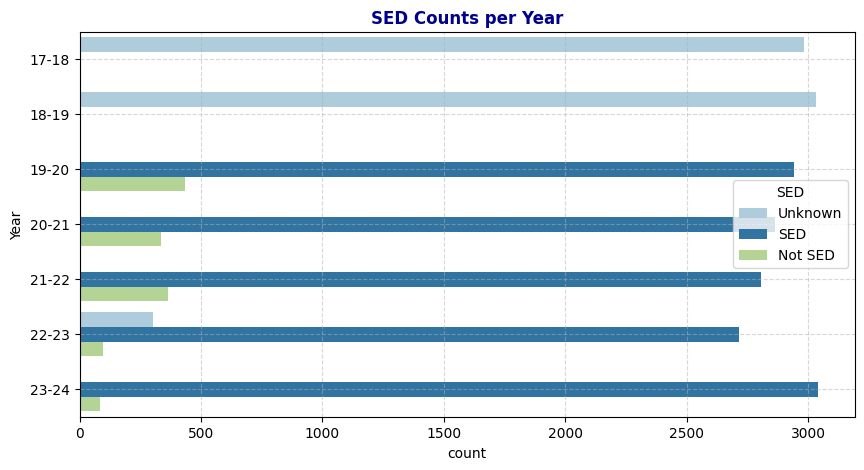

In [ ]:
# Plot SED counts per Year
plt.figure(figsize=(10, 5))
sns.countplot(data=schools, y='Year', hue='SED', palette='Paired')
plt.title('SED Counts per Year', fontweight='bold', color='darkblue')
plt.grid(True, linestyle='--', alpha=0.5)

In [ ]:
# Function to fill 'Unknown' 'SED' with matching 'ANON_ID' values
def fill_SED(row):
    if row['SED'] == 'Unknown':
        # Find the first non-null value of 'SED' for the same 'ANON_ID'
        matching_value = schools_cleaned[(schools_cleaned['ANON_ID'] == row['ANON_ID']) & (schools_cleaned['SED'].notna()) & (~schools_cleaned['SED'].isin(['Unknown']))]

        # If there is a match, return its 'SED' value; otherwise, return the original 'SED'
        if not matching_value.empty:
            return matching_value.iloc[0]['SED']
    return row['SED']

# Apply the function to the 'SED' column
schools_cleaned['SED'] = schools_cleaned.apply(fill_SED, axis=1)

### Duplicates and Irrelevant: Before and After

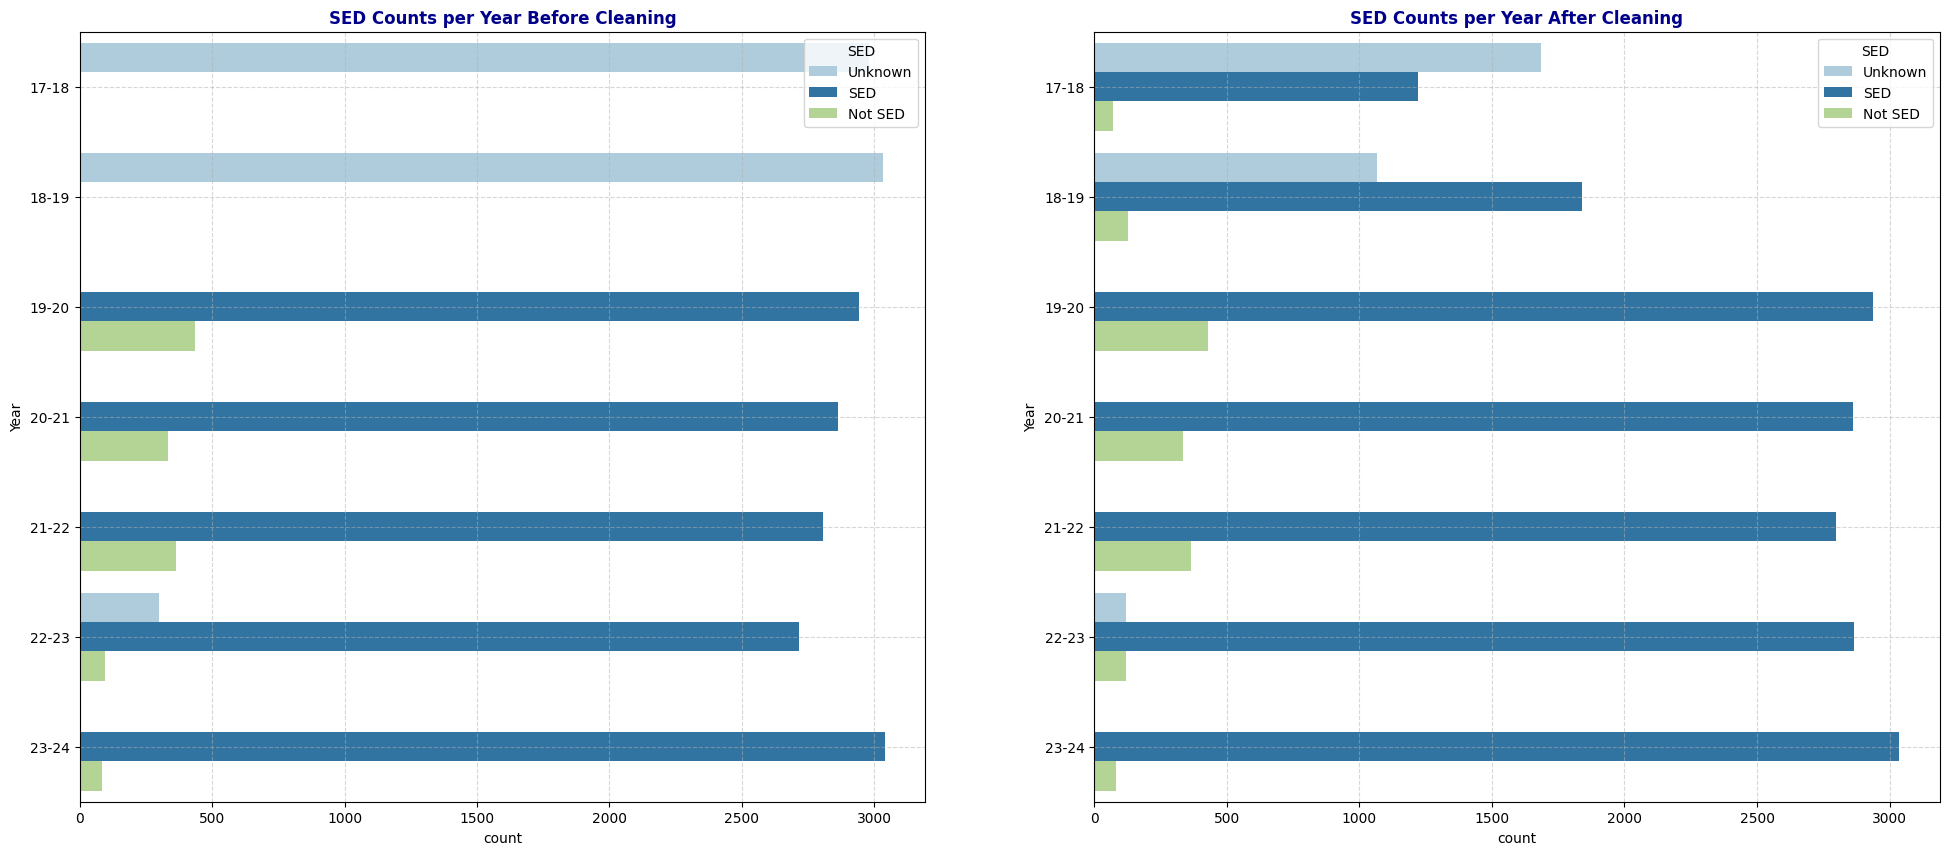

In [ ]:
#SED: Before and after
fig, axs = plt.subplots(
    nrows=1, ncols=2,
    figsize=(24, 10)
)
sns.countplot(data=schools, y='Year', hue='SED', palette='Paired', ax=axs[0])
axs[0].set_title('SED Counts per Year Before Cleaning', fontweight='bold', color='darkblue')
axs[0].grid(True, linestyle='--', alpha=0.5)
sns.countplot(data=schools_cleaned, y='Year', hue='SED', palette='Paired', ax=axs[1])
axs[1].set_title('SED Counts per Year After Cleaning', fontweight='bold', color='darkblue')
axs[1].grid(True, linestyle='--', alpha=0.5)
plt.show()

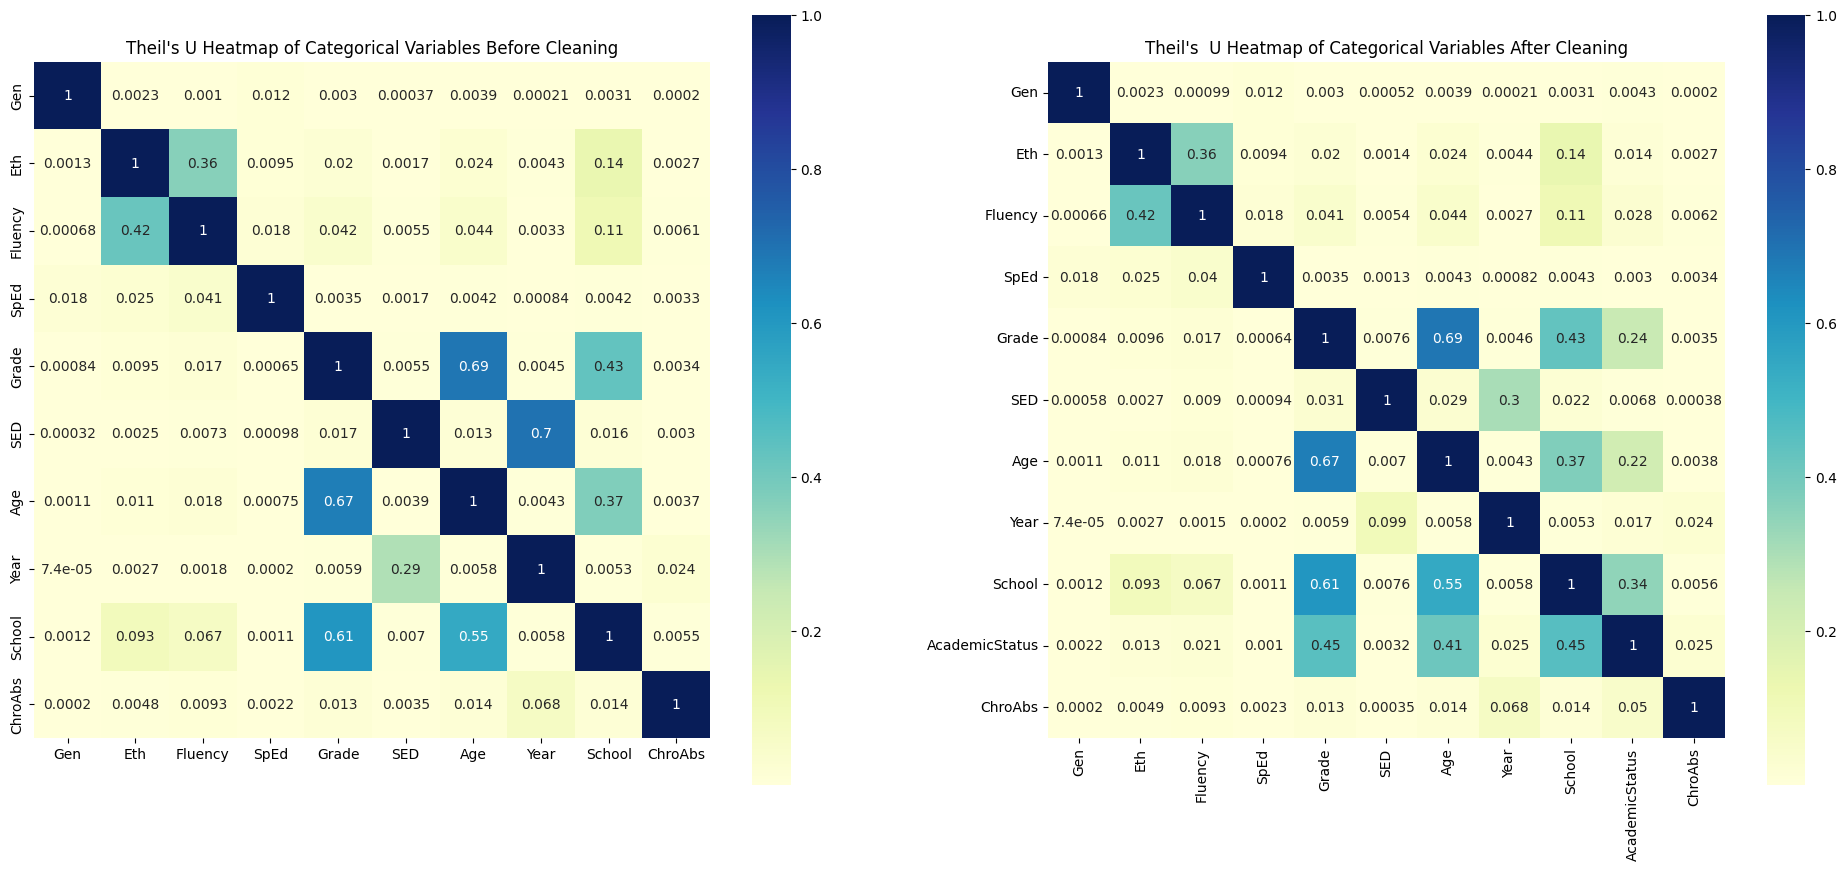

In [ ]:
# Theil's U Heat Map before and After
cat_cols_cleaned = ['Gen', 'Eth', 'Fluency', 'SpEd', 'Grade', 'SED', 'Age', 'Year', 'School','AcademicStatus', 'ChroAbs']
# Create an empty DataFrame to store Theil's U values
theils_u_matrix_cleaned = pd.DataFrame(index=cat_cols_cleaned, columns=cat_cols_cleaned)

# Fill the matrix with Theil's U values
for col1 in cat_cols_cleaned:
    for col2 in cat_cols_cleaned:
        if col1 == col2:
            theils_u_matrix_cleaned.loc[col1, col2] = 1  # Perfect association with itself
        else:
            theils_u_matrix_cleaned.loc[col1, col2] = theils_u(schools_cleaned[col1], schools_cleaned[col2])

# Convert to float for heatmap compatibility
theils_u_matrix_cleaned = theils_u_matrix_cleaned.astype(float)

fig, axs = plt.subplots(
    nrows=1, ncols=2,
    figsize=(24, 10)
)

# Plot the heatmap

sns.heatmap(theils_u_matrix_cleaned, annot=True, cmap="YlGnBu", square=True, ax=axs[1])
axs[1].set_title("Theil's  U Heatmap of Categorical Variables After Cleaning")
sns.heatmap(theils_u_matrix, annot=True, cmap="YlGnBu", square=True, ax=axs[0])
axs[0].set_title("Theil's U Heatmap of Categorical Variables Before Cleaning")
plt.show()

Observation: After modifying the Fluency and SED columns, I observed that Fluency retains its predictive power on Chronic Absenteeism, while SED shows a significant decrease in predictive strength (dropping from 0.0035 to 0.00035). One possible reason is that replacing Unknown values in SED diluted the relationship between Year and SED—since school years 2017-18 and 2018-19 no longer consist exclusively of Unknown values, SED no longer inherits the predictive power of Year on Chronic Absenteeism (where Year has the strongest predictive power).

Additionally, after transforming GPA into the categorical variable Academic Status, the heatmap now includes this new variable. Academic Status shows a strong predictive power on Chronic Absenteeism, with a correlation of 0.05, second only to Year. This aligns with the Pearson correlation heatmap observation where GPA and Attendance Rate had a strong correlation. Furthermore, Academic Status exhibits moderate predictive power on School, likely because elementary schools (covering grades -1 to 5) only have Unknown values in Academic Status.

# 4. Preprocessing for Machine Learning

Note on Selecting Variables for Our Machine Learning Model

- Exclude Personal Identifiers: Omit ANON_ID and Birthdate as these are personal identifiers that do not contribute to predicting Chronic Absenteeism.

- Exclude Redundant Attendance Metrics: Exclude AttRate, DaysEnr, and DaysAbs due to their strong dependency on one another, with Chronic Absenteeism (response variable ChroAbs) already capturing this information effectively.

- Encoding for Categorical Variables: Use one-hot encoding for all categorical variables, as they are nominal (non-ordinal). Label encoding would introduce artificial order, which is unnecessary and could mislead the model. Additionally, we’ll select a subset of categorical variables with high predictive power and a manageable number of unique categories to reduce model complexity.

- Exclude Weak Predictors: Exclude Gender and SED due to their minimal predictive power on Chronic Absenteeism.

- Address Potential Bias: Exclude Ethnicity to avoid potential racial bias. Retain Fluency, as it has a stronger predictive relationship with Chronic Absenteeism and moderate predictive power on Ethnicity.

- Simplify by Reducing Redundancy: Exclude Grade and Age as they have numerous unique values. Instead, retain School, which is strongly associated with both and provides similar information with fewer categories.

- Final Variable Selection: **AcademicStatus, Year, School, Fluency, and Special Ed** as they each exhibit strong predictive power for Chronic Absenteeism and will support a more interpretable model.


## 5. Next Steps

In [ ]:
X_col = ['Fluency','SpEd','SED', 'Grade', 'SED', 'Year', 'School', 'AcademicStatus']
y_col = 'ChroAbs'

In [ ]:
from sklearn.model_selection import train_test_split

X = df_transformed
y = schools_cleaned[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

**Next Steps**:  
- Train a classification model using `X_train` and `y_train`.  
- Evaluate its accuracy, precision, recall, and other metrics on `X_test`, `y_test`.  

**Thank you for reading!** This completes the data exploration phase and sets the stage for more detailed modeling and intervention planning.

---
